<a href="https://colab.research.google.com/github/iyan-coder/EDA-and-Model-Trainer-3/blob/main/BankMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏦 Bank Marketing Dataset – README & Exploratory Data Analysis

## 1. Problem Statement
A Portuguese bank ran several **phone‑based direct‑marketing campaigns** to convince clients to subscribe to a term deposit.  
Your task is to **predict whether a client will subscribe (`y`)** using the historic campaign data in **`bank.csv`**.

Why it matters  
- **Marketing efficiency** – call only the clients most likely to convert.  
- **Customer experience** – avoid annoying customers with irrelevant calls.  
- **Cost reduction** – fewer wasted minutes → lower outbound‑call costs.

---

## 2. Column Dictionary & Business Insight

| Column | Type | What it Means (Business Angle) |
|--------|------|--------------------------------|
| `age` | numeric | Customer’s age in years. Often U‑shaped effect: middle‑aged clients may be more financially stable, retirees may have idle funds. |
| `job` | categorical | Profession (e.g., *management*, *services*, *technician*). Relates to **income level** and financial literacy. |
| `marital` | categorical | *married*, *single*, *divorced*. Life stage can affect saving goals. |
| `education` | categorical | *primary*, *secondary*, *tertiary*, *unknown*. Higher education often ↗ adoption of financial products. |
| `default` | categorical | Has credit in default? *yes/no*. Strong negative signal for new deposits. |
| `balance` | numeric | Average yearly bank balance (EUR). Proxy for liquidity and trust in the bank. |
| `housing` | categorical | Has a housing loan? Indicates existing liabilities. |
| `loan` | categorical | Has personal loan? Similar to above; can reduce disposable income. |
| `contact` | categorical | Contact channel (*cellular*, *telephone*, *unknown*). Campaigns via mobile often perform better. |
| `day` | numeric | Last contact day of month (1–31). Not very predictive alone; combine with `month`. |
| `month` | categorical | *jan … dec*. Strong seasonal pattern: e.g., **May** & **October** often see spikes. |
| `duration` | numeric | Call length in seconds. ***Most predictive*** feature (longer calls → higher likelihood of “yes”) but beware: **leakage** if used in real‑time predictions. |
| `campaign` | numeric | Number of contacts with this client during the campaign. Repeated calls may wear people out. |
| `pdays` | numeric | Days passed since client was last contacted (−1 means *never*). Small value ⇒ recently called. |
| `previous` | numeric | How many prior contacts in past campaigns. |
| `poutcome` | categorical | Outcome of the **previous** campaign (*success*, *failure*, *other*, *unknown*). Historical success is a strong positive signal. |
| `y` | target | *yes* if the client subscribed; otherwise *no*. **Imbalanced** (~11 % “yes”). |

---


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Display all the columns of the dataframe
pd.set_option('display.max_rows', 130)  # to view all 122 rows
pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.width', 1000)  # avoid column wrapping

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [74]:
df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### Checking shape of dataset

In [76]:
print(f"The number of rows is {df.shape[0]} and the number of columns is {df.shape[1]}")

The number of rows is 11162 and the number of columns is 17


### Checking number of columns and names of columns

In [77]:
print(f"The have {len(df.columns)} columns in this dataset")
print("=" * 30)
print(f"The names of the dataset are stated below: \n {df.columns}")

The have 17 columns in this dataset
The names of the dataset are stated below: 
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit'], dtype='object')


### Checkiing missing values

In [78]:
missing_values = {feature: np.round(df[feature].isnul().mean() * 100, 4)
                  for feature in df.columns if df[feature].isnull().sum() > 0}

missing_series = pd.Series(missing_values).sort_values(ascending=True)
print(f"The total number of coulmns which has missing values is {len(missing_values)}")
print("="*30)
print(f"The columns with missing value is stated below:\n{missing_series}%")

The total number of coulmns which has missing values is 0
The columns with missing value is stated below:
Series([], dtype: object)%


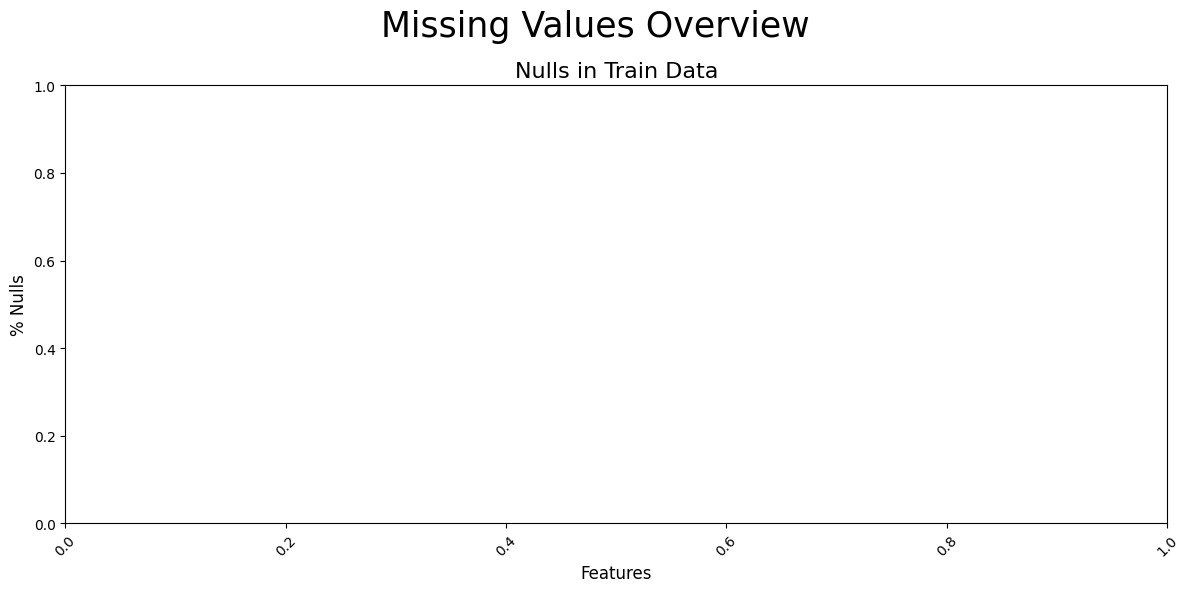

In [79]:
def plot_nulls_short(train):
    fig, ax = plt.subplots(figsize=(12, 6))  # removed list/loop since only one axis

    null_percent = train.isnull().mean() * 100
    null_percent = null_percent[null_percent > 0].sort_values(ascending=False)
    sns.barplot(x=null_percent.index, y=null_percent.values, ax=ax)
    ax.set_title('Nulls in Train Data', fontsize=16)
    ax.set_xlabel('Features', fontsize=12)
    ax.set_ylabel('% Nulls', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

    for i, val in enumerate(null_percent.values):
        ax.text(i, val + 1, f'{val:.1f}%', ha='center')

    plt.suptitle('Missing Values Overview', fontsize=25)
    plt.tight_layout()
    plt.show()

# Run it
plot_nulls_short(df)

### Checking duplicate

In [80]:
print(f"There are {df.duplicated().sum()} duplicate in the dataset")

There are 0 duplicate in the dataset


### Checking imbalance dataset

In [81]:
target = df["deposit"].value_counts()
print("The target distribution")
for label, trian in target.items():
  print(f"{label}:{trian}")

The target distribution
no:5873
yes:5289


In [82]:
target = df["deposit"].value_counts(normalize=True) * 100
print("The target distribution")
for label, trian in target.items():
  print(f"{label}:{trian} %")

The target distribution
no:52.61601863465329 %
yes:47.38398136534671 %


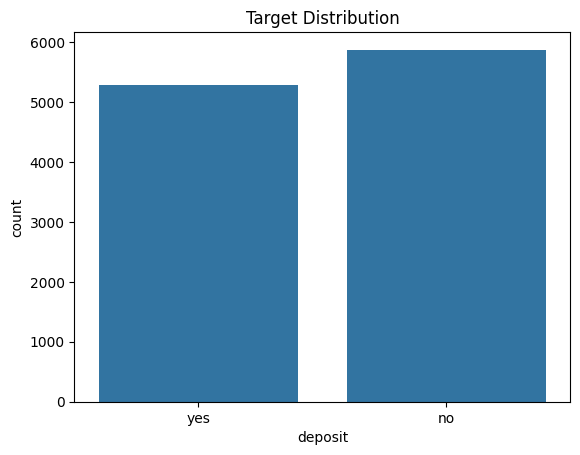

In [83]:
sns.countplot(x="deposit",data=df)
plt.title("Target Distribution")
plt.show()

Visualisation confirms that dataset is not imbalance

### Checking corr with target

In [84]:
import pandas as pd
import numpy as np

# 1. Ensure target exists and is numeric
df["deposit"] = df["deposit"].map({"yes": 1, "no": 0}).astype(int)

# 2. Grab numeric columns (including the new target)
num_cols = df.select_dtypes(include=[np.number])

# 3. Correlation of every numeric feature with the target,
#    then drop the trivial self‑correlation
corr_with_target = (
    num_cols.corr()["deposit"]
    .drop("deposit")          # optional but cleaner
    .sort_values(ascending=False)
)

print(corr_with_target.head(5))


duration    0.451919
pdays       0.151593
previous    0.139867
balance     0.081129
age         0.034901
Name: deposit, dtype: float64


| Rank  | Feature    | ρ with `deposit`   | What It Means                                                                                                                                                                                                              | Action / Caution                                                                                                                                                                  |
| ----- | ---------- | ------------------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **1** | `duration` | **+0.45** (strong) | Longer phone calls strongly predict a “yes.” Customers who stay on the line are engaged.                                                                                                                                   | **Feature leakage alert** – you only know call length *after* the call. Build either (a) a second *post‑call* model **or** (b) drop `duration` for a *pre‑call* propensity model. |
| **2** | `pdays`    | +0.15 (moderate)   | Higher `pdays` (longer since last contact) seems to raise success slightly in your sample. Often the effect is **non‑linear**: very recent follow‑ups can feel spammy, but reaching back after a cooling‑off period helps. | Bucket or spline‑encode `pdays` (e.g. `never`, `0–7`, `8–30`, `30+`) to capture the curve.                                                                                        |
| **3** | `previous` | +0.14 (moderate)   | More prior contacts over past campaigns modestly increases odds of subscription—relationship‑building pays off.                                                                                                            | Cap at, say, 5 to dampen outliers; consider interaction with `poutcome`.                                                                                                          |
| **4** | `balance`  | +0.08 (weak)       | Higher average account balance slightly boosts conversion—customers with spare cash.                                                                                                                                       | Log‑transform `balance` (right‑skewed) and watch for extreme outliers; effect is real but small.                                                                                  |
| **5** | `age`      | +0.03 (very weak)  | Age alone barely moves the needle after other variables are considered.                                                                                                                                                    | Leave it in for completeness, but don’t expect lift; try non‑linear bins (retirees, students).                                                                                    |


### Statistical infomation

In [85]:
df.describe().T.sort_values(by="std", ascending=True).head()

,count,mean,std,min,25%,50%,75%,max
deposit,11162.0,0.473840,0.499338,0.0,0.0,0.0,1.0,1.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.0,58.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.0,63.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.0,31.0
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.0,95.0


### Checking datatypes

In [86]:
print(f"The datatypes are stated below: \n {df.dtypes}")

The datatypes are stated below: 
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit       int64
dtype: object


### Checking numerical columns

In [87]:
numerical_columns =  [feature for feature in df.columns if df[feature].dtypes != "O" and feature not in ["deposit"]]
print(f"The number of numerical columns is {len(numerical_columns)}")
print("=" * 30)
df[numerical_columns].head()

The number of numerical columns is 7


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [88]:
for feature in numerical_columns:
  print(f"Unique Values: {feature}")
  print(df[feature].unique())
  print("=" * 30)

Unique Values: age
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
Unique Values: balance
[2343   45 1270 ... 1594 2593 -134]
Unique Values: day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
Unique Values: duration
[1042 1467 1389 ... 1504  818 1812]
Unique Values: campaign
[ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 41 63 27 30 26 23 28 33 31]
Unique Values: pdays
[ -1 166  91 147 170 150 171 126 182 110 198 174 175  27 128 100 177 167
 122 183 195 133 178  34  10 163 184 154  99  93   2 242 272  76 160  90
 196 246 238 203 268 189 267  92   9  88  85 210 257 261 270 106 199 112
  41 294 231 239 302 135 307 222 138 323 141 320 264 316 315 256 146 328
  74 148 327 341 145 266 234 345 318 325 274 343 260 305 344 254 1

In [89]:
categorical_columns =  [feature for feature in df.columns if df[feature].dtypes == "O"]
print(f"The number of categorical columns is {len(categorical_columns)}")
print("=" * 60)
df[categorical_columns].head()

The number of categorical columns is 9


,job,marital,education,default,housing,loan,contact,month,poutcome
0,admin.,married,secondary,no,yes,no,unknown,may,unknown
1,admin.,married,secondary,no,no,no,unknown,may,unknown
2,technician,married,secondary,no,yes,no,unknown,may,unknown
3,services,married,secondary,no,yes,no,unknown,may,unknown
4,admin.,married,tertiary,no,no,no,unknown,may,unknown


In [90]:
for feature in categorical_columns:
  print(f"Unique Values: {feature}")
  print(df[feature].unique())
  print("=" * 30)

Unique Values: job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
Unique Values: marital
['married' 'single' 'divorced']
Unique Values: education
['secondary' 'tertiary' 'primary' 'unknown']
Unique Values: default
['no' 'yes']
Unique Values: housing
['yes' 'no']
Unique Values: loan
['no' 'yes']
Unique Values: contact
['unknown' 'cellular' 'telephone']
Unique Values: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique Values: poutcome
['unknown' 'other' 'failure' 'success']


### EDA analysis

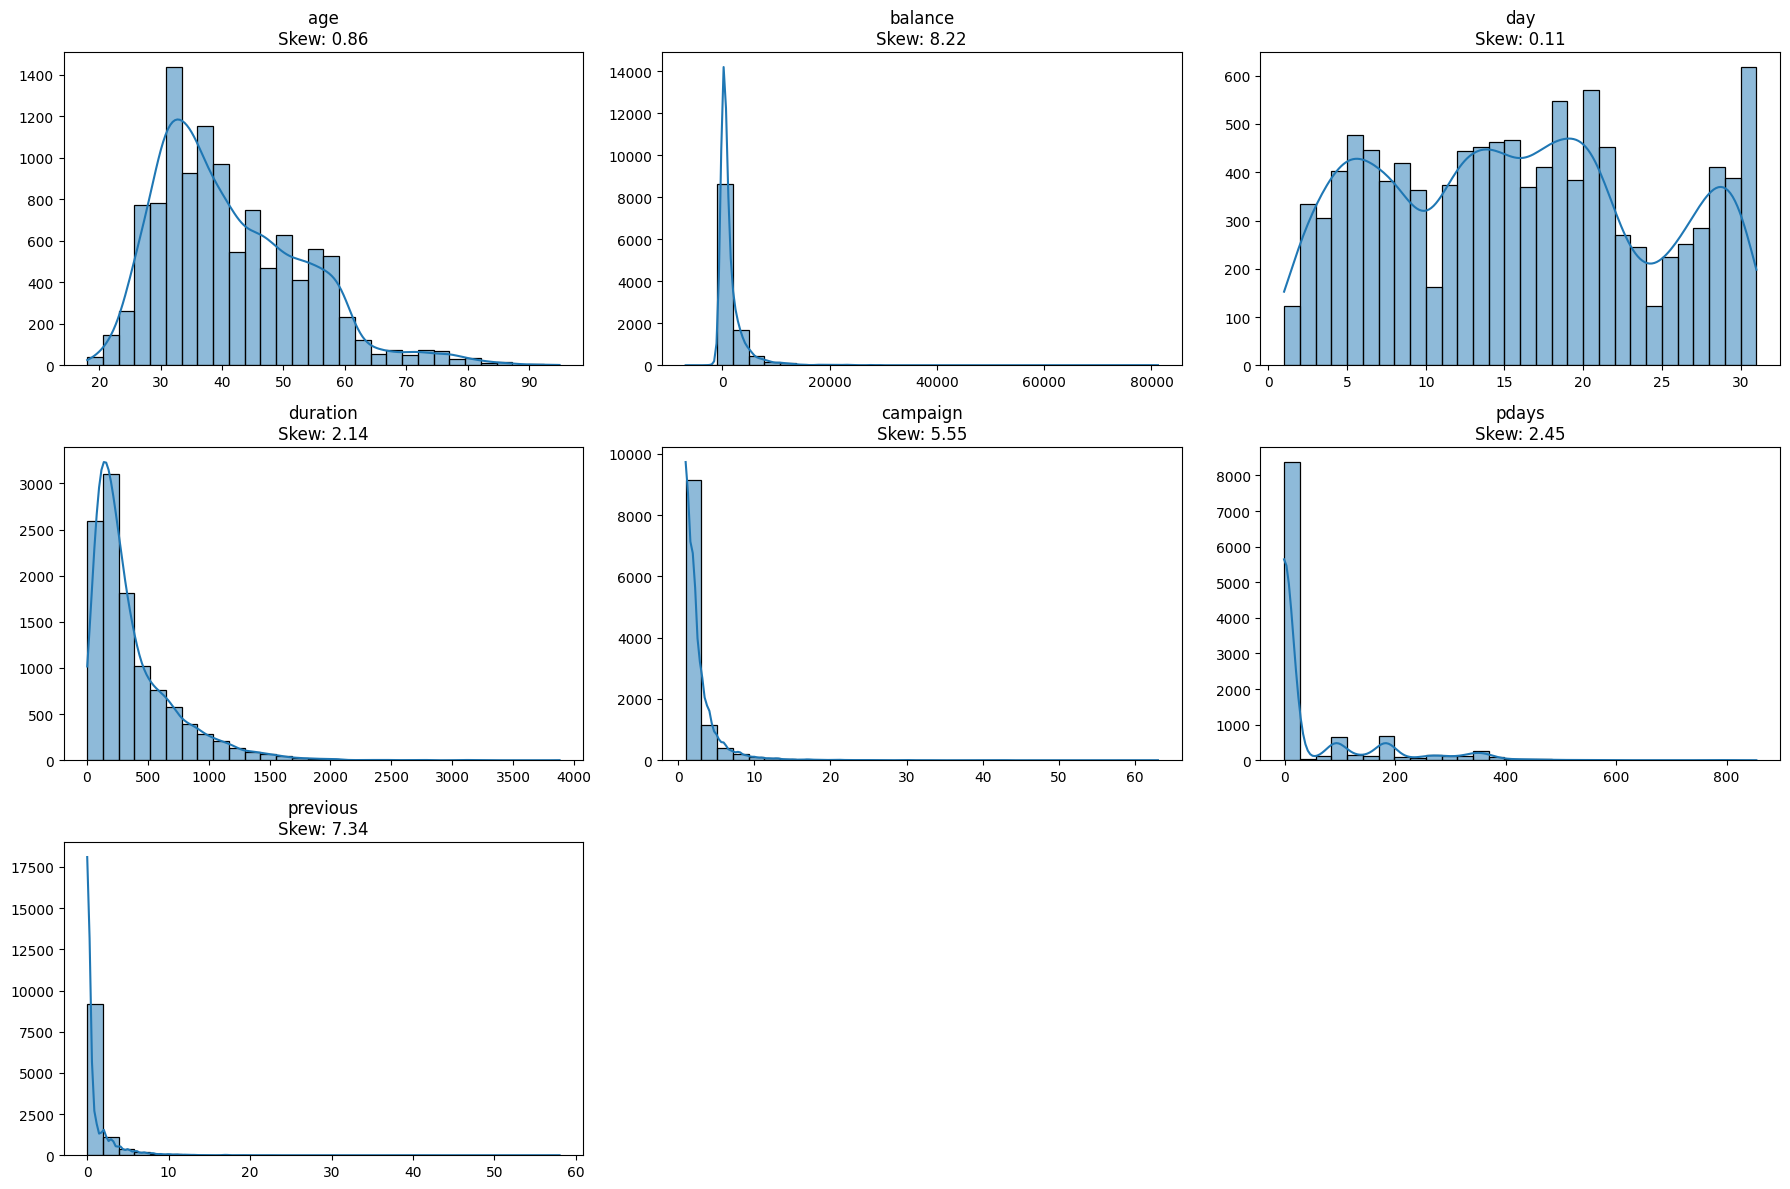

In [91]:
import math

# Assuming `continuous_numerical_columns` is your list of continuous features
n_cols = 3  # You can change this to 3 or 4 if you want more per row
n_rows = math.ceil(len(numerical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()  # Flatten in case of 1D

for i, feature in enumerate(numerical_columns):
    sns.histplot(df[feature], kde=True, bins=30, ax=axes[i], palette="Set1")
    axes[i].set_title(f"{feature}\nSkew: {df[feature].skew():.2f}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


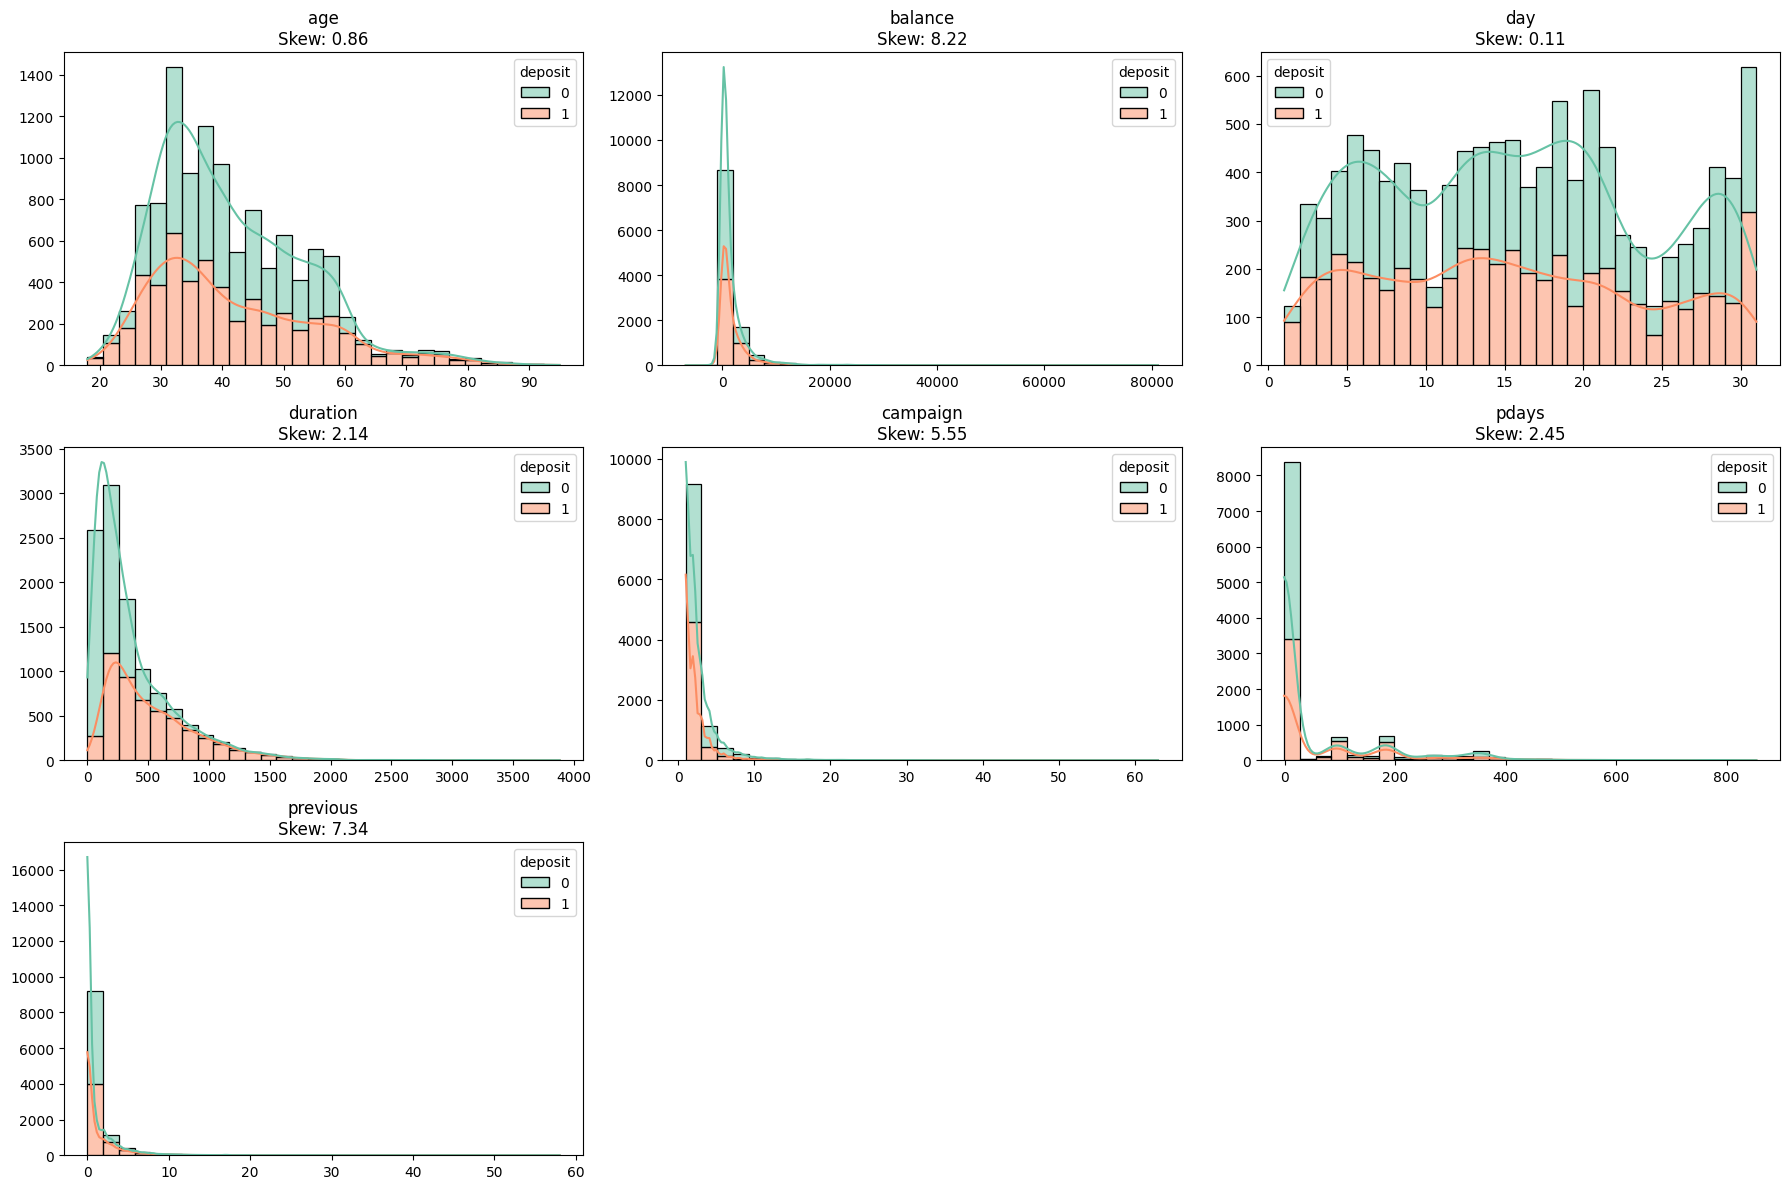

In [93]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming numerical_columns is defined
n_cols = 3
n_rows = math.ceil(len(numerical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(numerical_columns):
    sns.histplot(
        data=df,
        x=feature,
        hue='deposit',              # Split by churn
        kde=True,
        bins=30,
        multiple='stack',        # or 'dodge' for side-by-side
        ax=axes[i],
        palette='Set2'
    )
    axes[i].set_title(f"{feature}\nSkew: {df[feature].skew():.2f}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Numerical Feature**

| Feature    | Distribution & outliers                                         | Skew         | Relationship with `deposit`                                                 |
| ---------- | --------------------------------------------------------------- | ------------ | --------------------------------------------------------------------------- |
| `age`      | Mild high‑age tail; a few outliers ⋙ 70 yrs                     | Slight right | Converters \~1 yr older on avg; retirees rank high.                         |
| `balance`  | Heavy right tail, extreme positives; negatives rare but present | Strong right | Mean balance \~€1 980 for prior‑success group vs €1 441 for unknown.        |
| `duration` | Strong right skew, long‑call outliers (>2 000 s)                | Very right   | **Most predictive** feature; longer calls ↑ odds, but leaks post‑call info. |
| `campaign` | Long right tail; 90 % ≤ 3 calls                                 | Right        | More than 3 follow‑ups → diminishing returns.                               |
| `pdays`    | Bimodal: ‑1 and positive values; ‑1 dominates                   | Right        | Low `pdays` (recent contact) ↑ success; ‑1 behaves like distinct category.  |
| `previous` | Most zeros, a few high values                                   | Right        | Prior interactions ↑ success until about 5 then plateau.                    |
| `day`      | Uniform 1–31, **no outliers**                                   | Nearly flat  | Weak standalone signal.                                                     |


In [94]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

age: 171 outliers
balance: 1055 outliers
day: 0 outliers
duration: 636 outliers
campaign: 601 outliers
pdays: 2750 outliers
previous: 1258 outliers


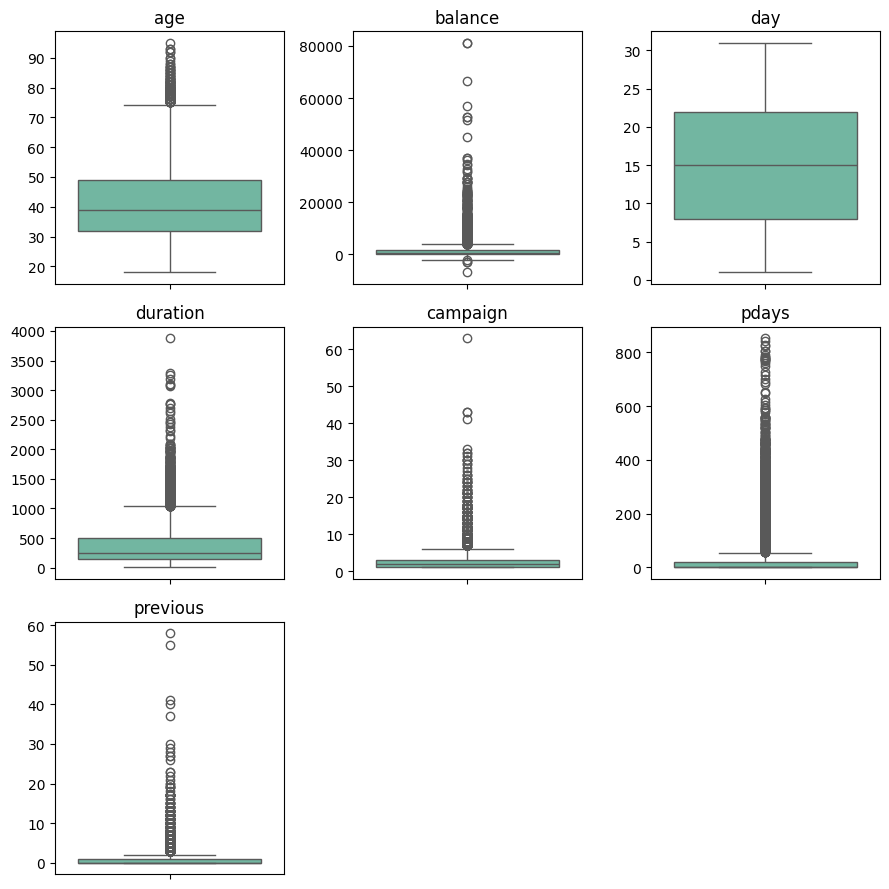

In [105]:
##Using box-plot
n_cols = 3
n_rows = math.ceil(len(numerical_columns)/n_cols)

fig, axes = plt.subplots(n_cols,n_rows, figsize=(n_cols*3, n_rows*3))
axes = axes.flatten()

for i, feature in enumerate(numerical_columns):
    sns.boxplot(df[feature],ax=axes[i],palette="Set2")
    axes[i].set_title(f"{feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Outlier check: Except for day, every numeric variable shows notable outliers. Consider winsorising or log‑transforming balance, duration, campaign, pdays, previous.


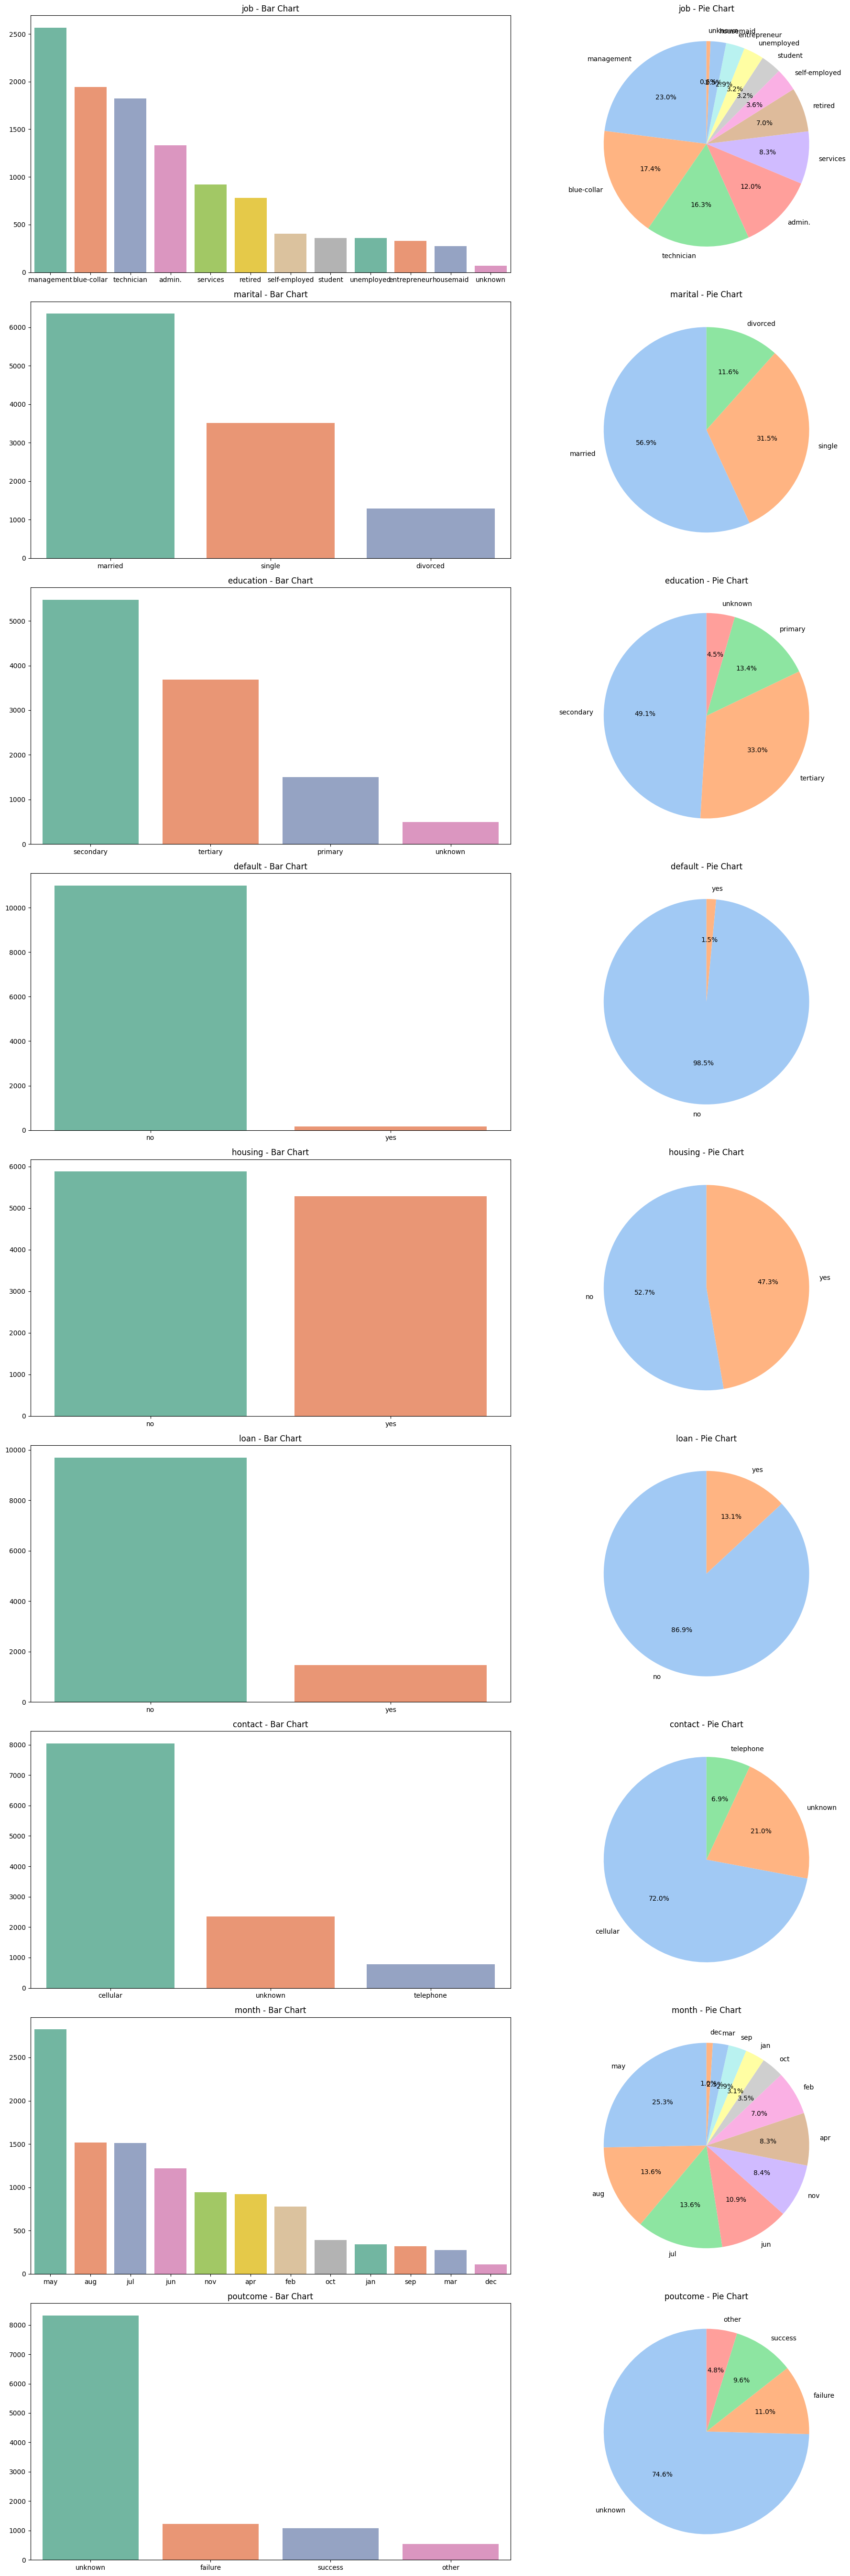

In [99]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Two plots per feature
total_plots = len(categorical_columns) * 2
n_cols = 2
n_rows = math.ceil(total_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*10, n_rows*6))
axes = axes.flatten()

plot_idx = 0

for feature in categorical_columns:
    #  Bar Chart
    bar_ax = axes[plot_idx]
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, ax=bar_ax,palette="Set2")
    bar_ax.set_title(f"{feature} - Bar Chart")
    bar_ax.set_xlabel("")
    bar_ax.set_ylabel("")
    plot_idx += 1

    #  Pie Chart
    pie_ax = axes[plot_idx]
    values = df[feature].value_counts()
    labels = values.index
    pie_ax.pie(values, labels=labels, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
    pie_ax.set_title(f"{feature} - Pie Chart")
    plot_idx += 1

# Remove any leftover unused subplots
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


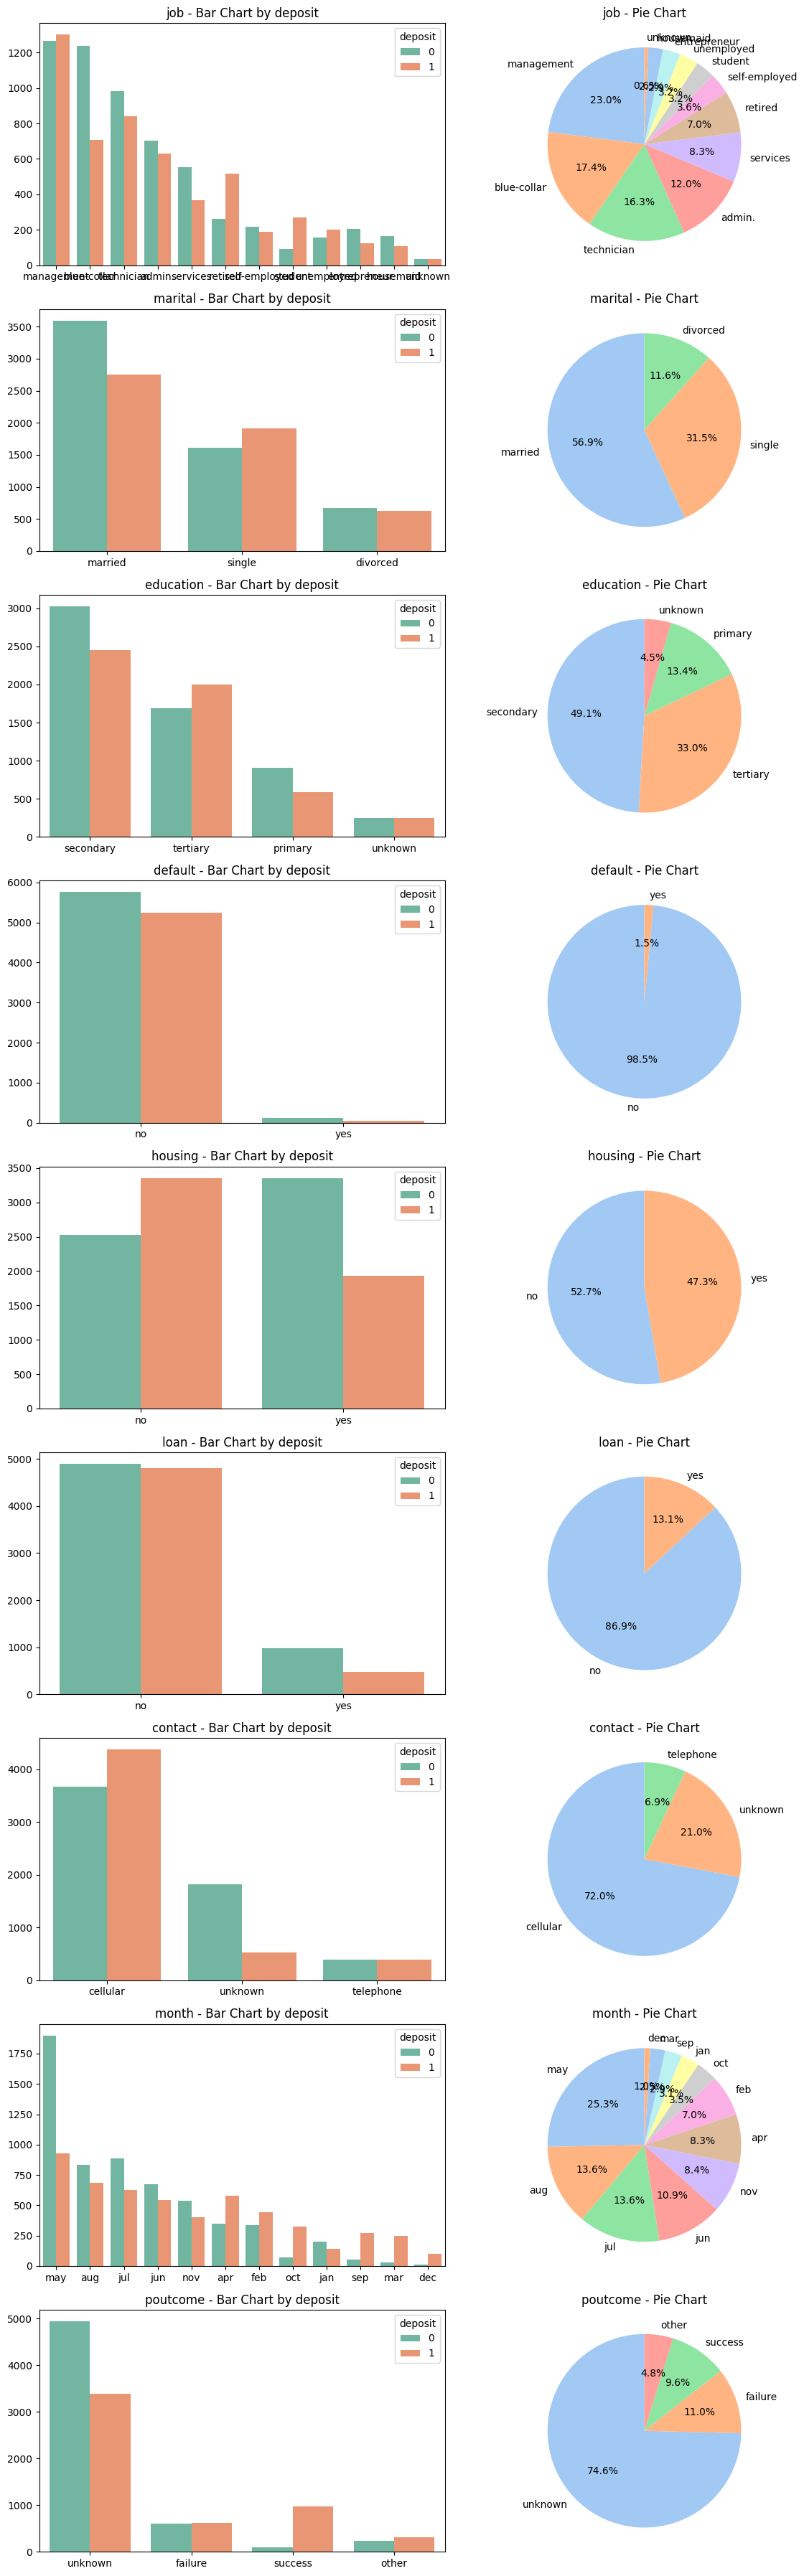

In [107]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Two plots per feature (bar + pie)
total_plots = len(categorical_columns) * 2
n_cols = 2
n_rows = math.ceil(total_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
axes = axes.flatten()

plot_idx = 0

for feature in categorical_columns:
    #  Bar Chart with hue='Churn'
    bar_ax = axes[plot_idx]
    sns.countplot(
        data=df,
        x=feature,
        hue='deposit',  # This shows split by churned vs not churned
        order=df[feature].value_counts().index,
        ax=bar_ax,
        palette="Set2"
    )
    bar_ax.set_title(f"{feature} - Bar Chart by deposit")
    bar_ax.set_xlabel("")
    bar_ax.set_ylabel("")
    plot_idx += 1

    #  Pie Chart (still full distribution, no split)
    pie_ax = axes[plot_idx]
    values = df[feature].value_counts()
    labels = values.index
    pie_ax.pie(
        values,
        labels=labels,
        autopct="%1.1f%%",
        startangle=90,
        colors=sns.color_palette("pastel")
    )
    pie_ax.set_title(f"{feature} - Pie Chart")
    plot_idx += 1

# Remove any unused axes
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Key Categorical Insights**

| Feature                       | Segment(s) with **highest** subscription rate           | Segment(s) with **lowest** subscription rate | Business takeaway                                                                       |
| ----------------------------- | ------------------------------------------------------- | -------------------------------------------- | --------------------------------------------------------------------------------------- |
| **Job**                       | *Student* (75 %), *Retired* (66 %), *Management* (51 %) | *Blue‑collar* (36 %), *Entrepreneur* (38 %)  | Prioritise students, retirees and managers for future campaigns.                        |
| **Marital**                   | *Single* (54 %)                                         | *Married* (44 %)                             | Singles respond better; tailor messaging to life stage.                                 |
| **Education**                 | *Tertiary* (54 %), *Unknown* (51 %)                     | *Primary* (39 %)                             | Higher education correlates with uptake; simplify offer for primary‑educated customers. |
| **Default status**            | *No default* (48 %)                                     | *Has default* (31 %)                         | Active defaults signal higher risk and lower interest in deposits.                      |
| **Housing loan**              | *No housing loan* (57 %)                                | *Has housing loan* (37 %)                    | Clients without mortgage obligations are more likely to invest.                         |
| **Personal loan**             | *No personal loan* (50 %)                               | *Has personal loan* (33 %)                   | Debt burden reduces conversion.                                                         |
| **Contact method**            | *Cellular* (54 %)                                       | *Unknown* (23 %)                             | Mobile calls outperform landlines; avoid “unknown” channel.                             |
| **Month**                     | *Dec (91 %), Mar (90 %), Sep (84 %), Oct (82 %)*        | *May (33 %), Jan (41 %)*                     | Strong seasonality: schedule pushes in March, September, October, December.             |
| **Previous campaign outcome** | *Success* (91 %), *Other* (57 %)                        | *Unknown* (41 %)                             | Re‑target customers who previously converted.                                           |


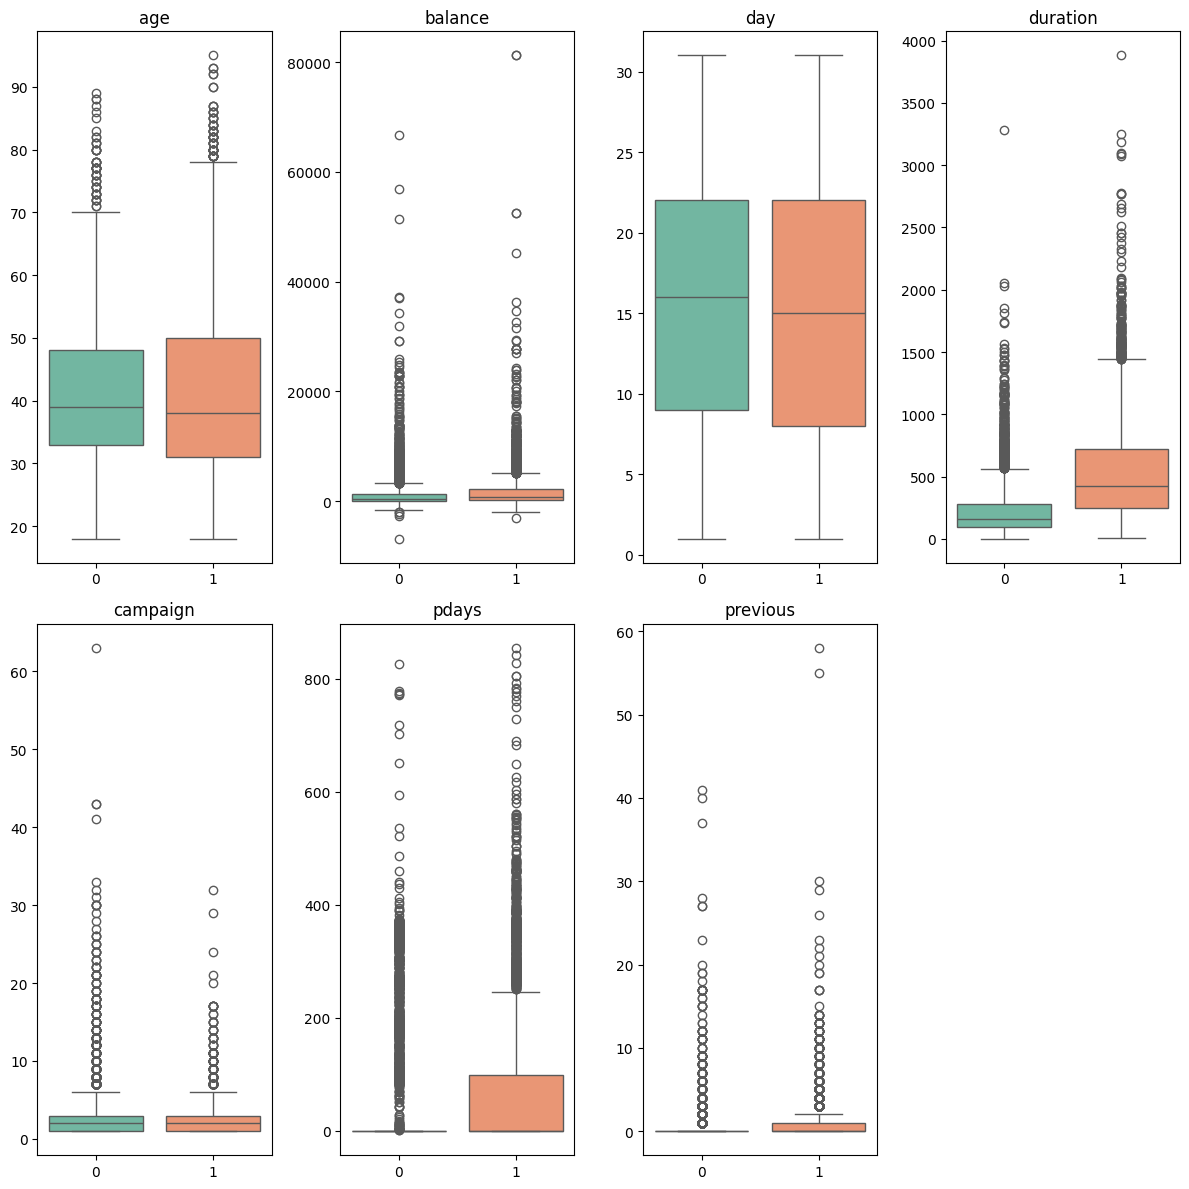

In [110]:
##Using box-plot
n_cols = 2
n_rows = math.ceil(len(numerical_columns)/n_cols)

fig, axes = plt.subplots(n_cols,n_rows, figsize=(n_cols*6, n_rows*3))
axes = axes.flatten()

for i, feature in enumerate(numerical_columns):
    sns.boxplot(data=df, x= 'deposit', y=feature,ax=axes[i],palette="Set2")
    axes[i].set_title(f"{feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [111]:
target_col = "deposit"

# # Safe map only if it's not already numeric
# if df[target_col].dtype == 'object':
#     df[target_col] = df[target_col].map({'Y': 1, 'N': 0})

for col in categorical_columns:
    print(f"\n{col} vs {target_col} (Normalized Counts):")
    print(df.groupby(col)[target_col].value_counts(normalize=True))

    print(f"\n{col} vs Avg Deposit Approval Rate:")
    print(df.groupby(col)[target_col].mean())


for num_col in numerical_columns:
    print(f"\nAvg {num_col} by {col}:")
    print(df.groupby(col)[num_col].mean())


job vs deposit (Normalized Counts):
job            deposit
admin.         0          0.526987
               1          0.473013
blue-collar    0          0.635802
               1          0.364198
entrepreneur   0          0.625000
               1          0.375000
housemaid      0          0.602190
               1          0.397810
management     1          0.507015
               0          0.492985
retired        1          0.663239
               0          0.336761
self-employed  0          0.538272
               1          0.461728
services       0          0.600217
               1          0.399783
student        1          0.747222
               0          0.252778
technician     0          0.539221
               1          0.460779
unemployed     1          0.565826
               0          0.434174
unknown        0          0.514286
               1          0.485714
Name: proportion, dtype: float64

job vs Avg Loan Approval Rate:
job
admin.           0.473013
blue-


Visualizing numeric features grouped by: job


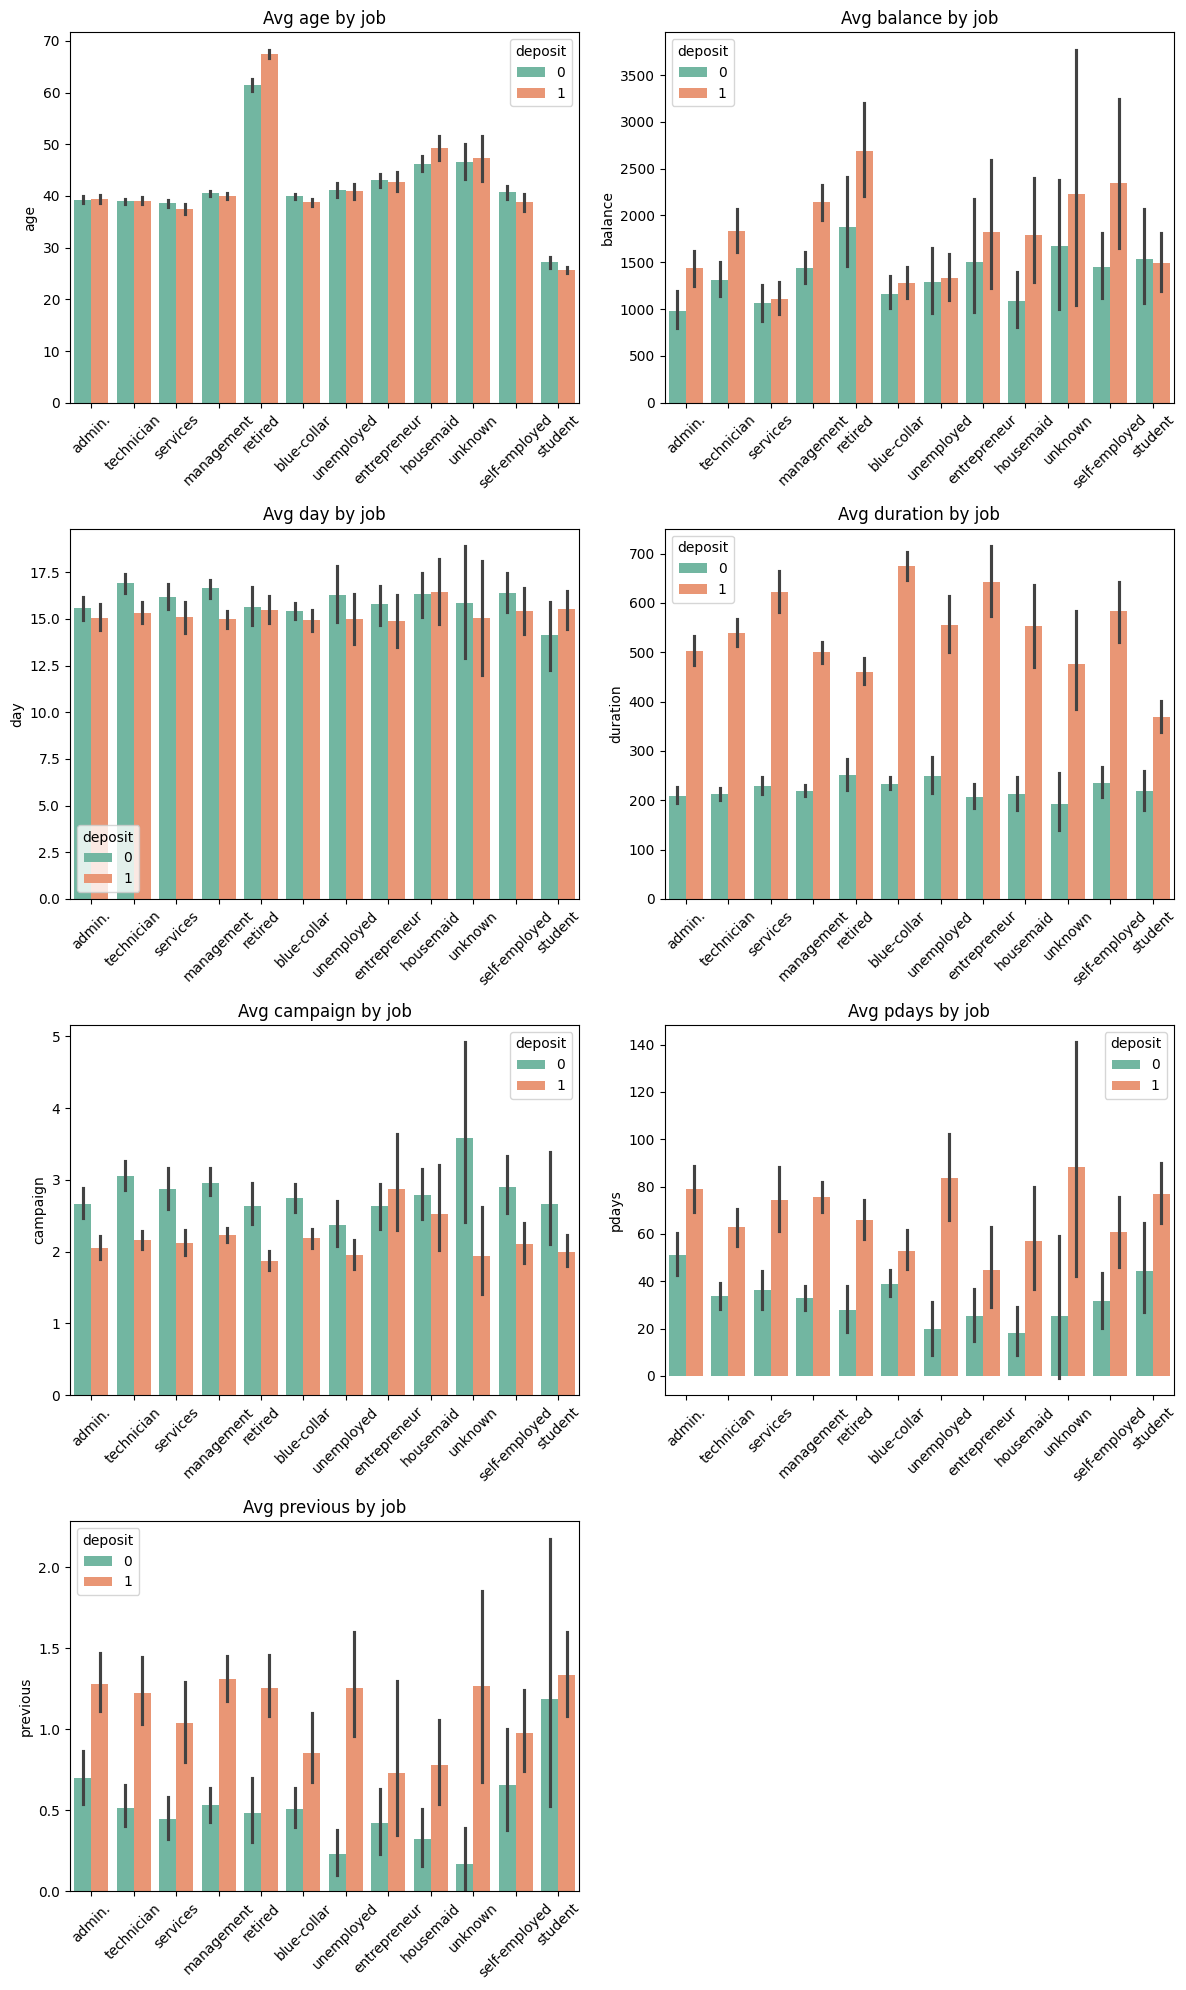


Visualizing numeric features grouped by: marital


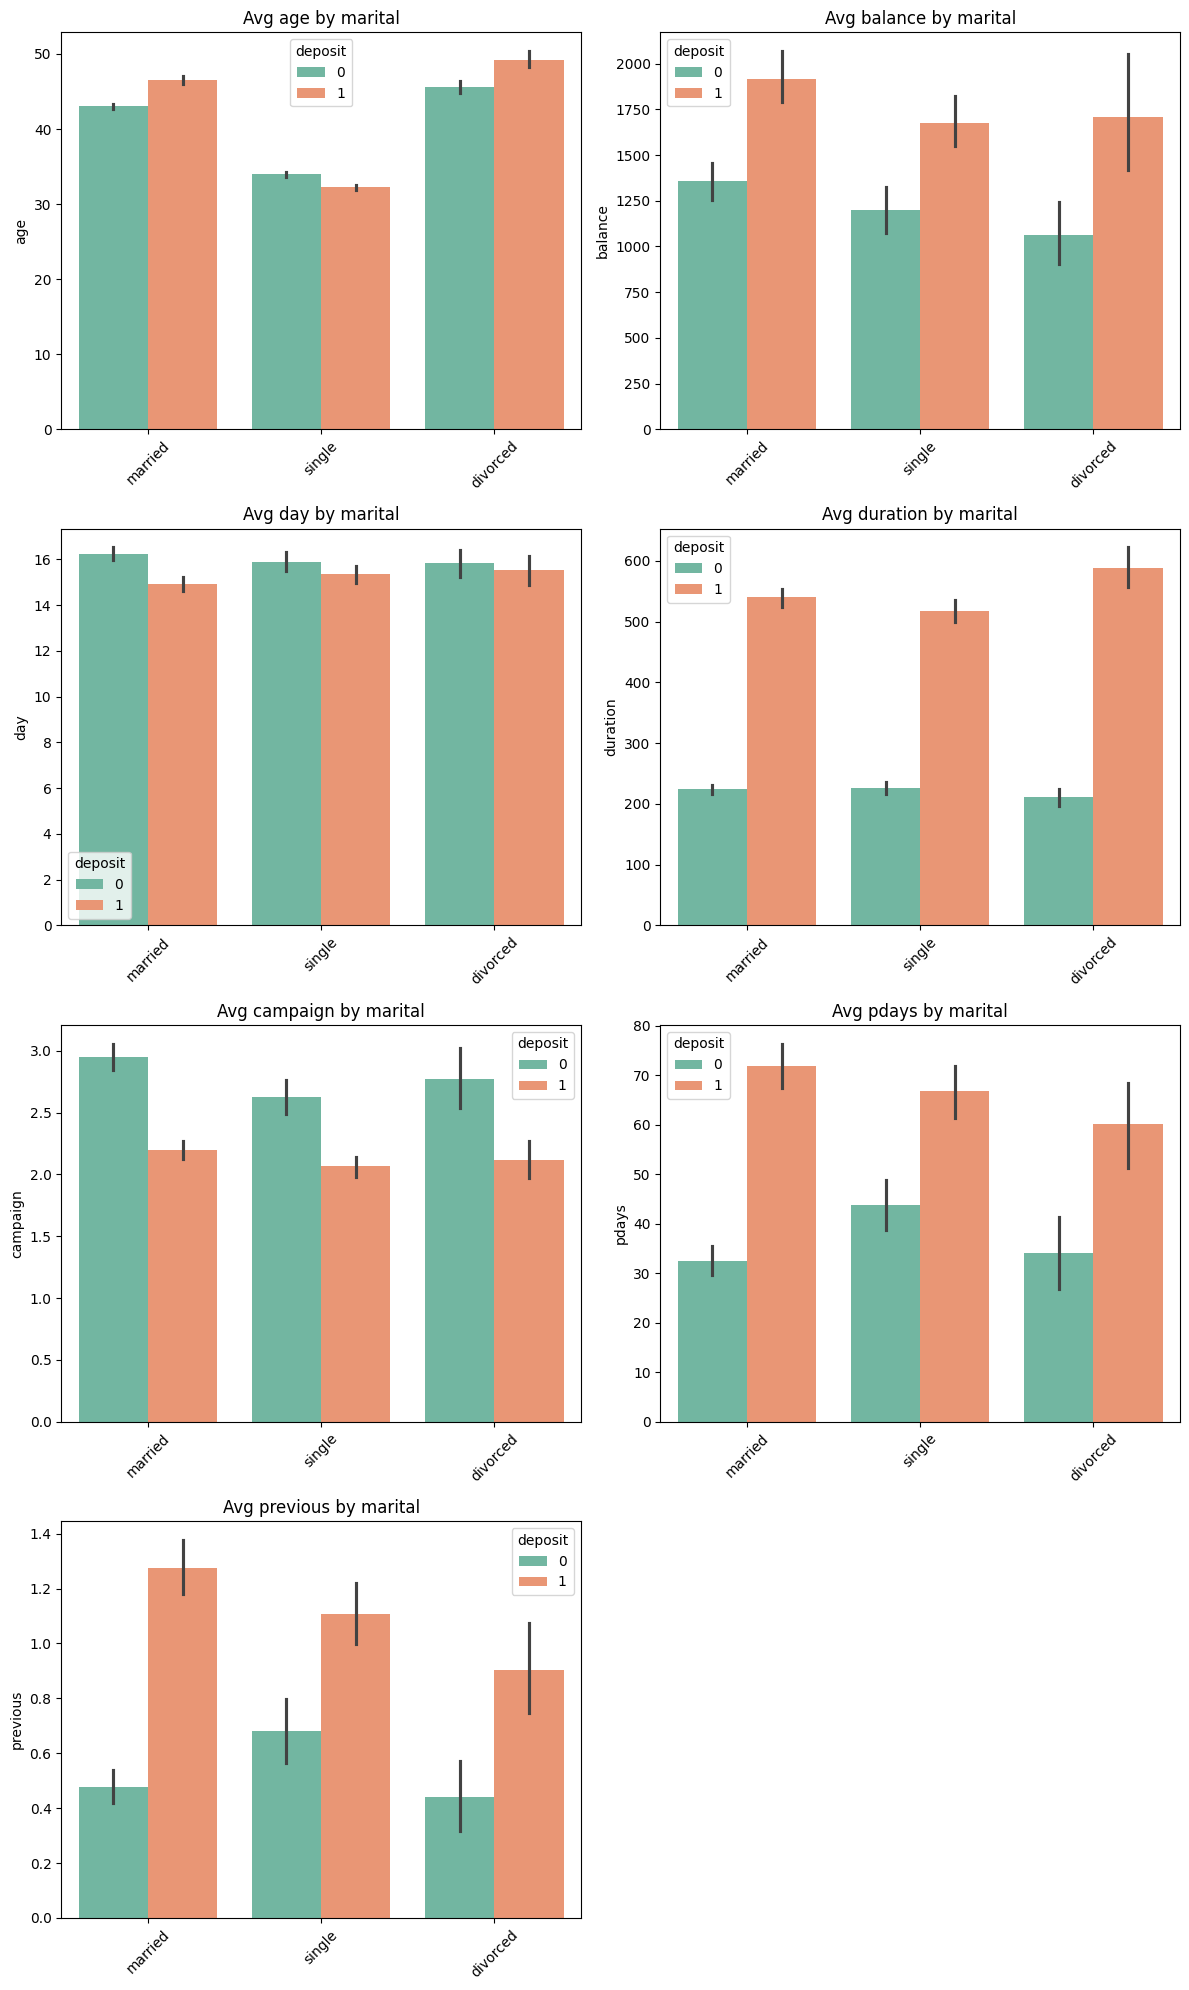


Visualizing numeric features grouped by: education


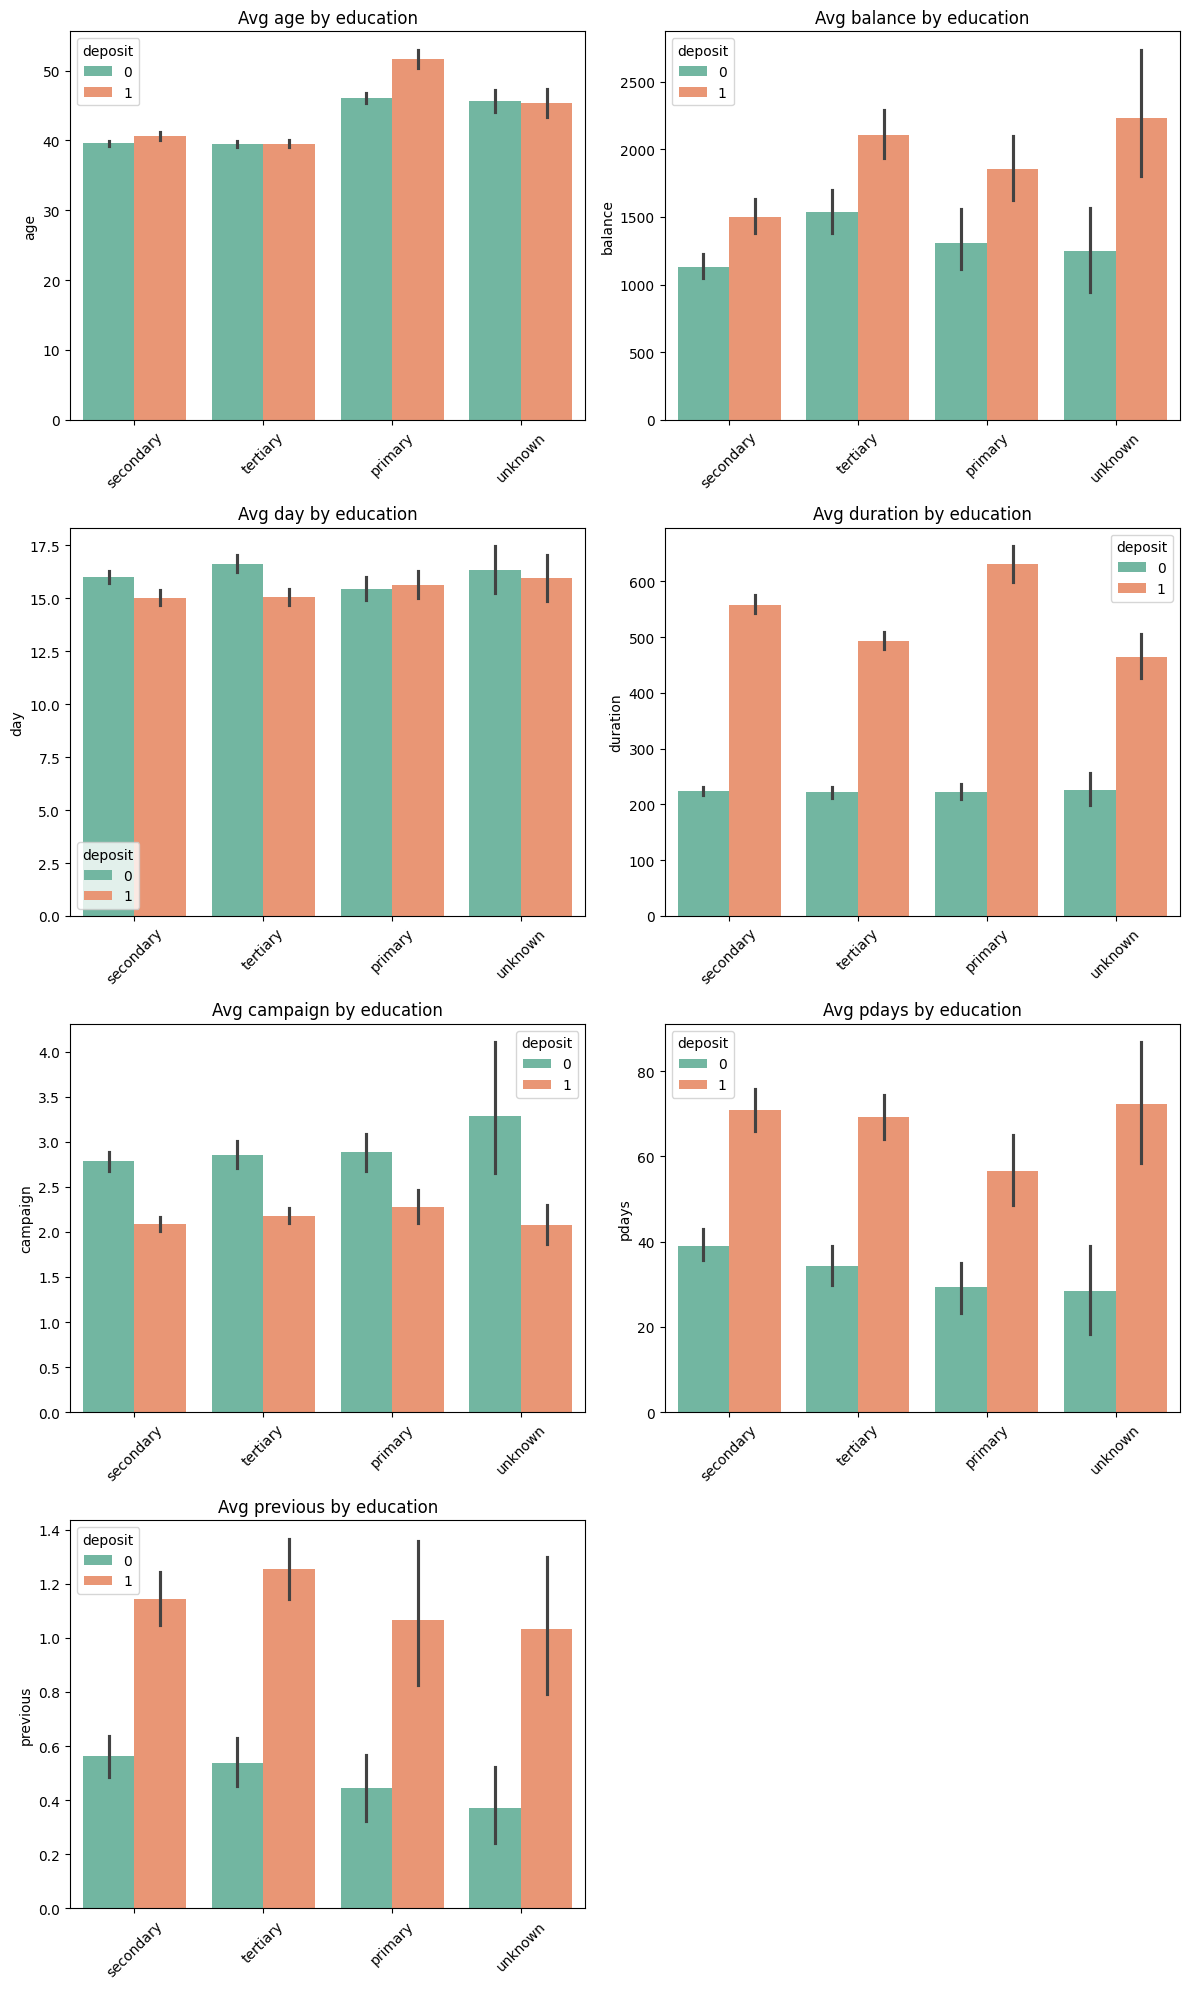


Visualizing numeric features grouped by: default


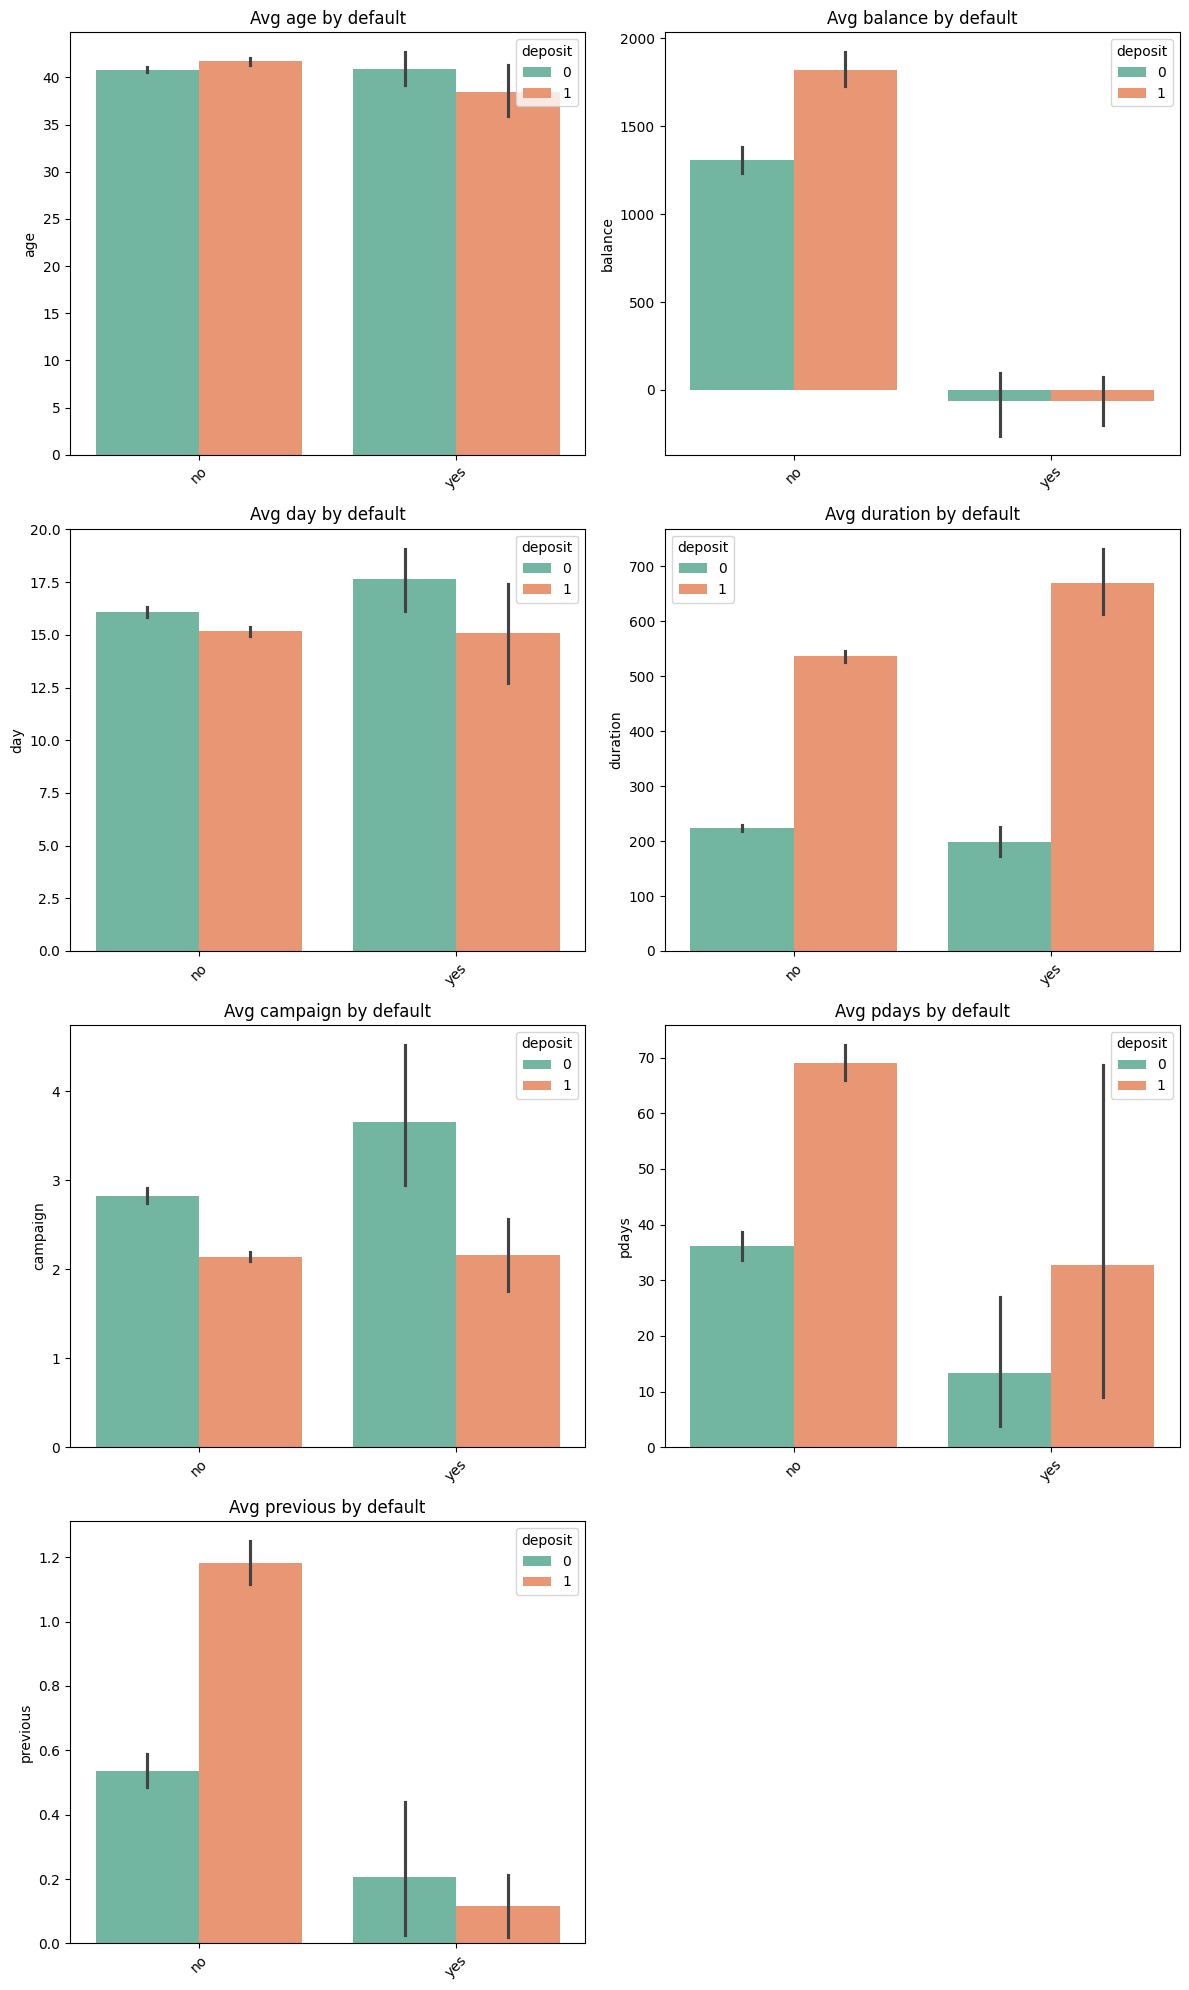


Visualizing numeric features grouped by: housing


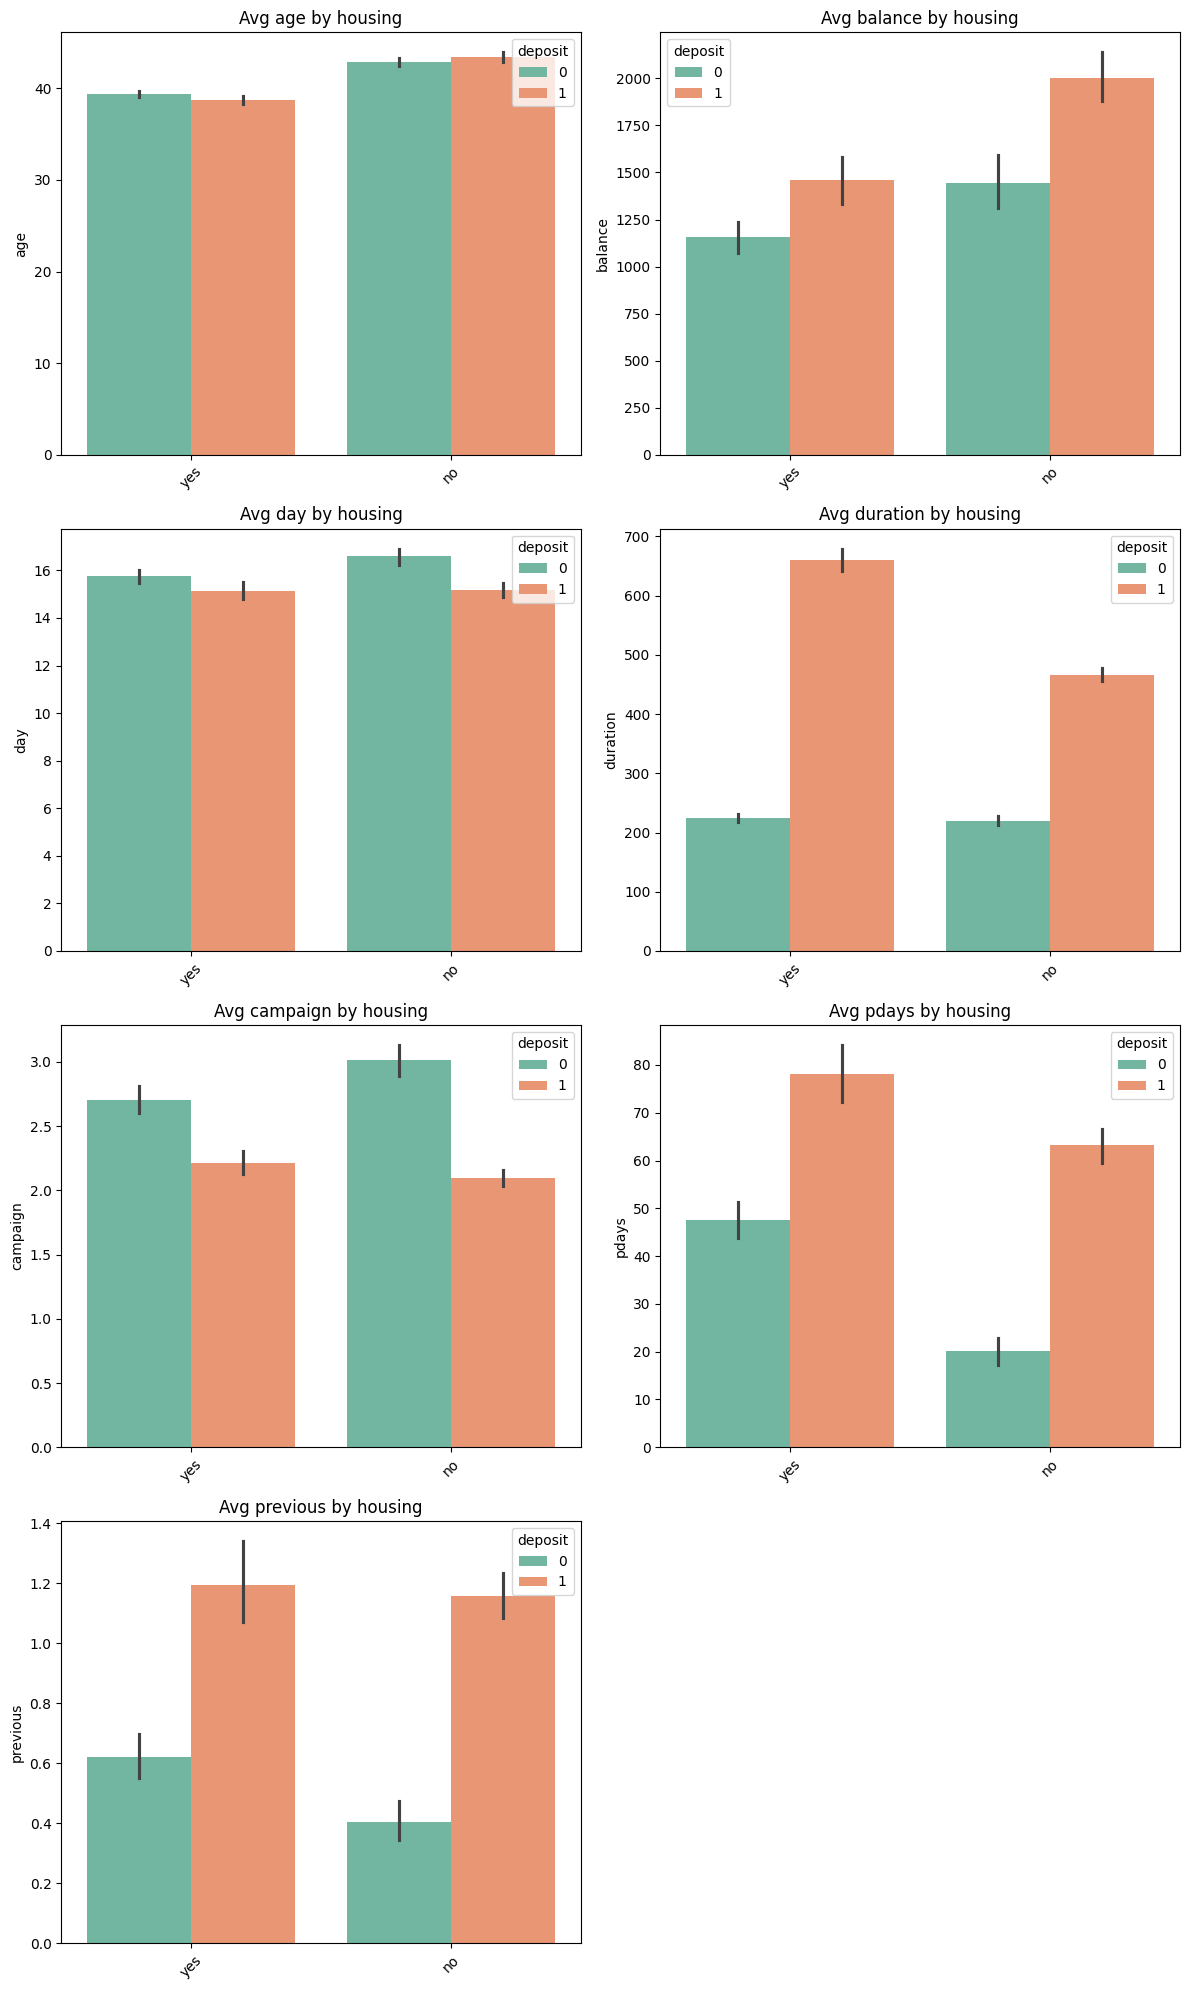


Visualizing numeric features grouped by: loan


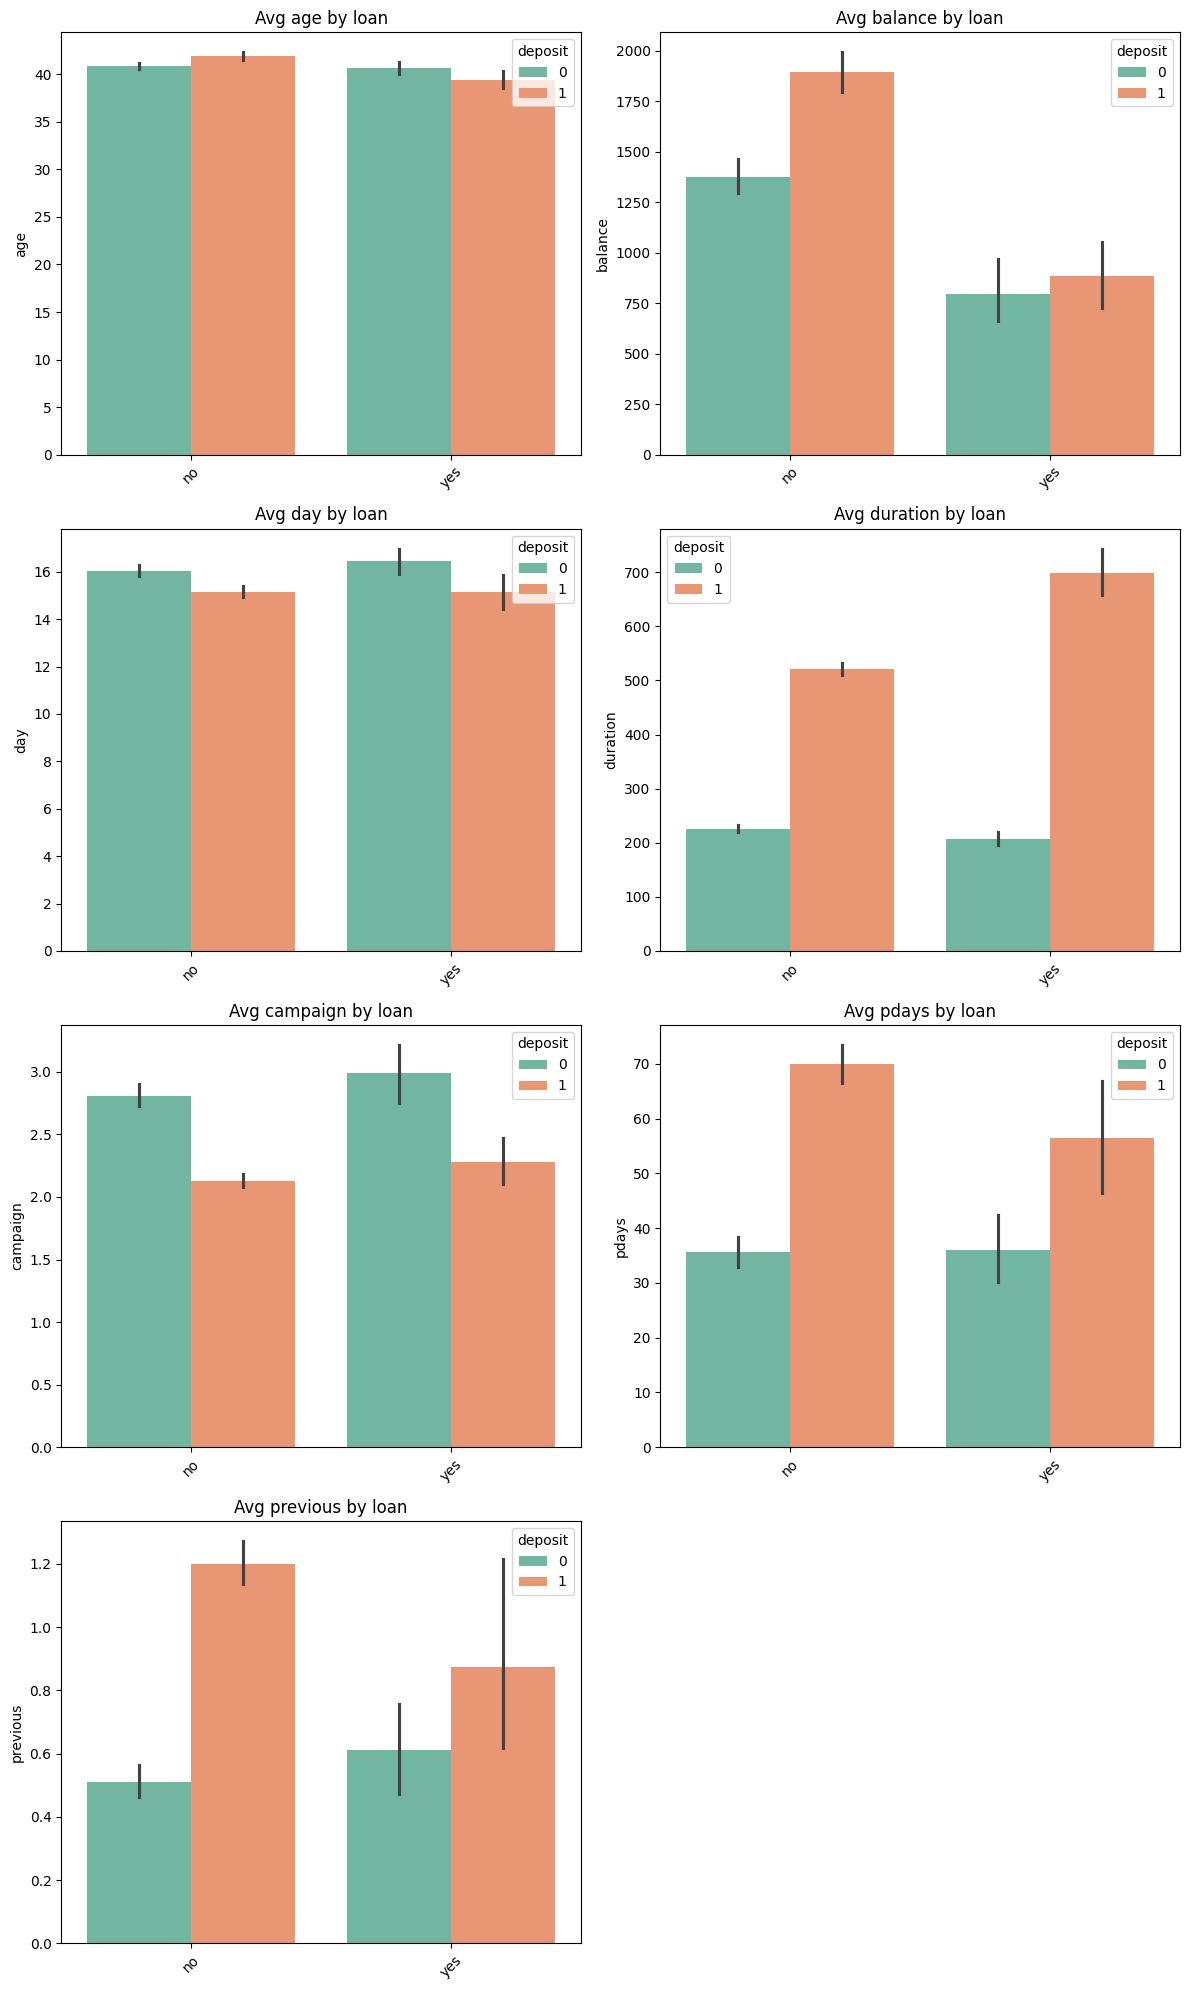


Visualizing numeric features grouped by: contact


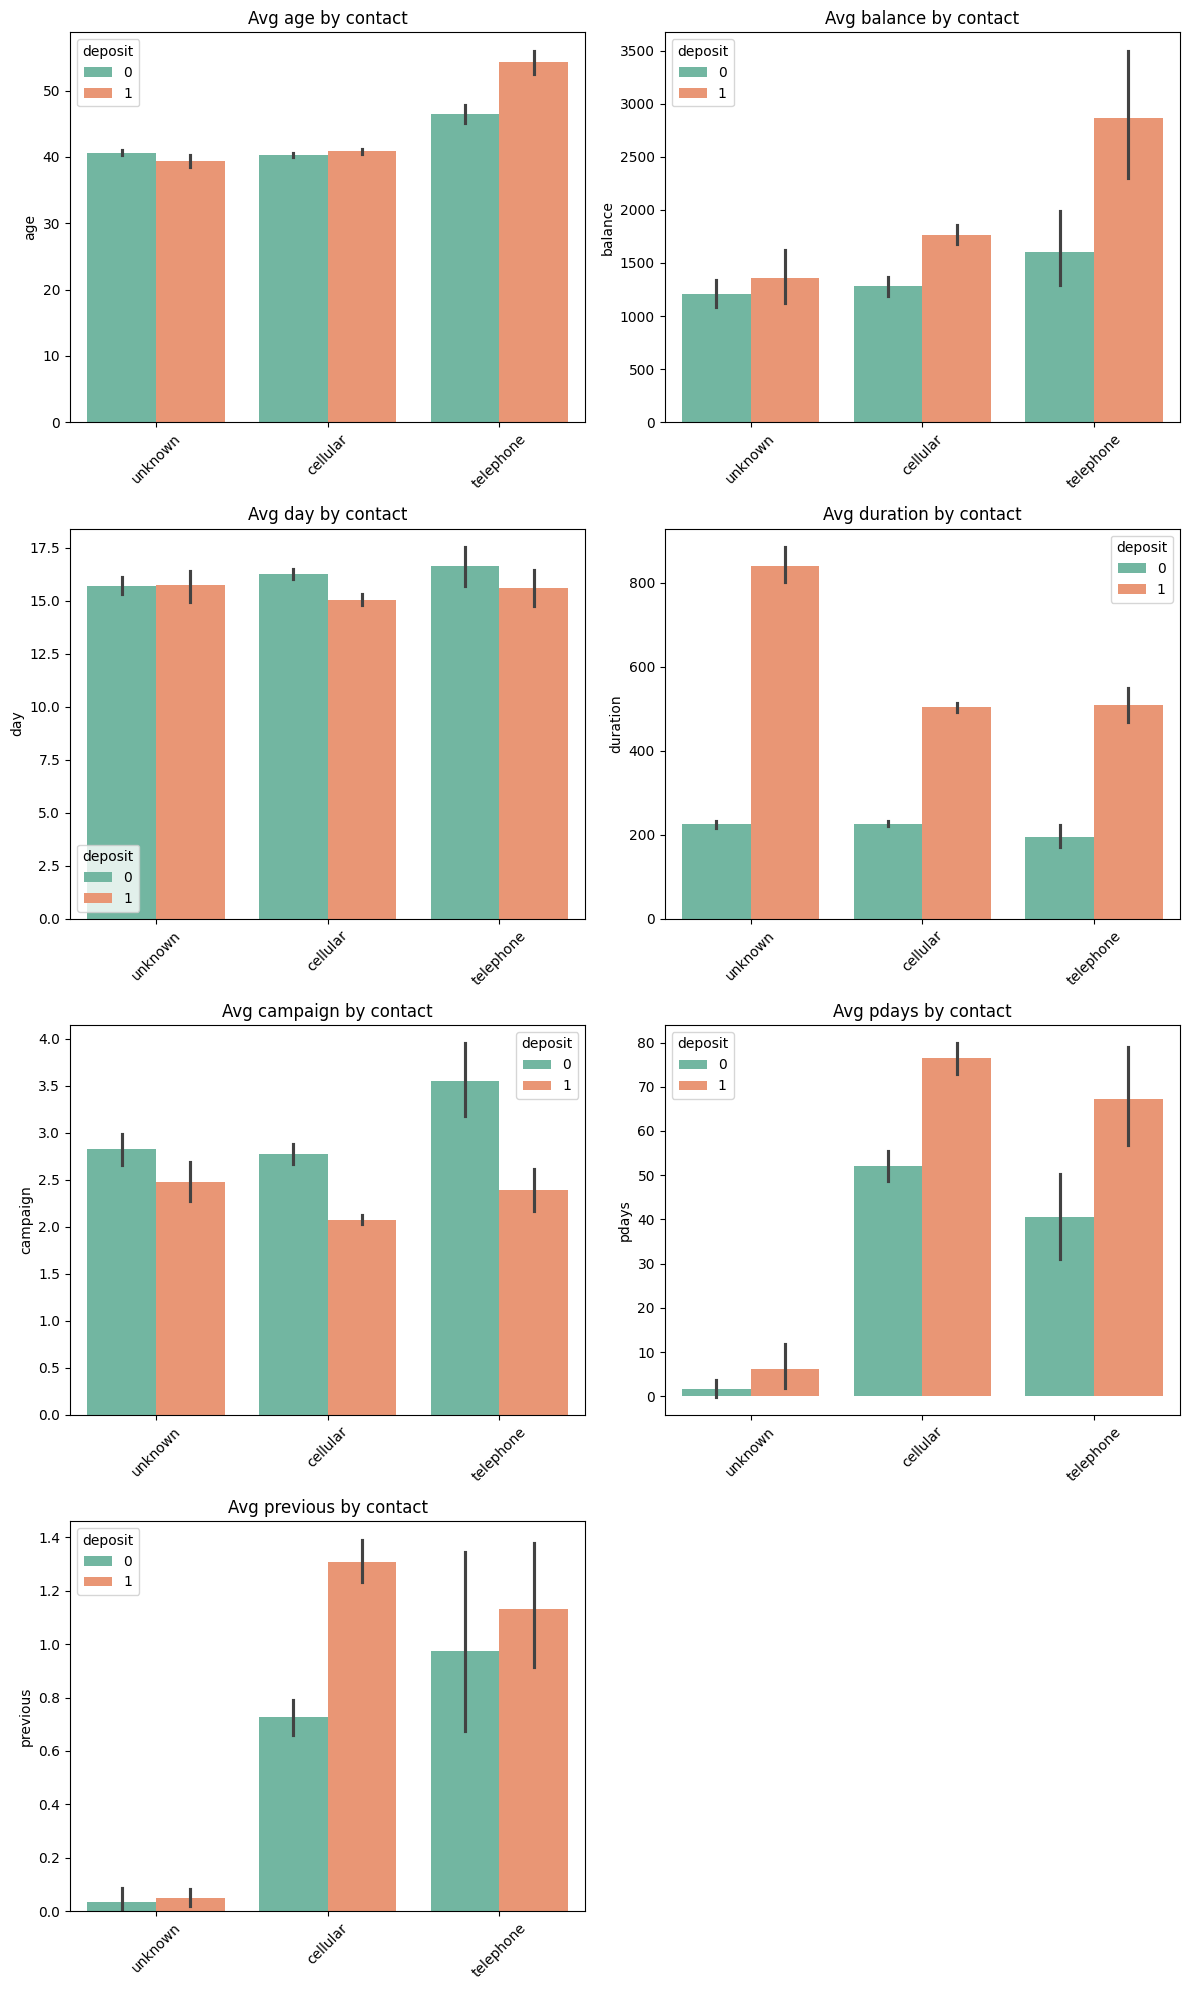


Visualizing numeric features grouped by: month


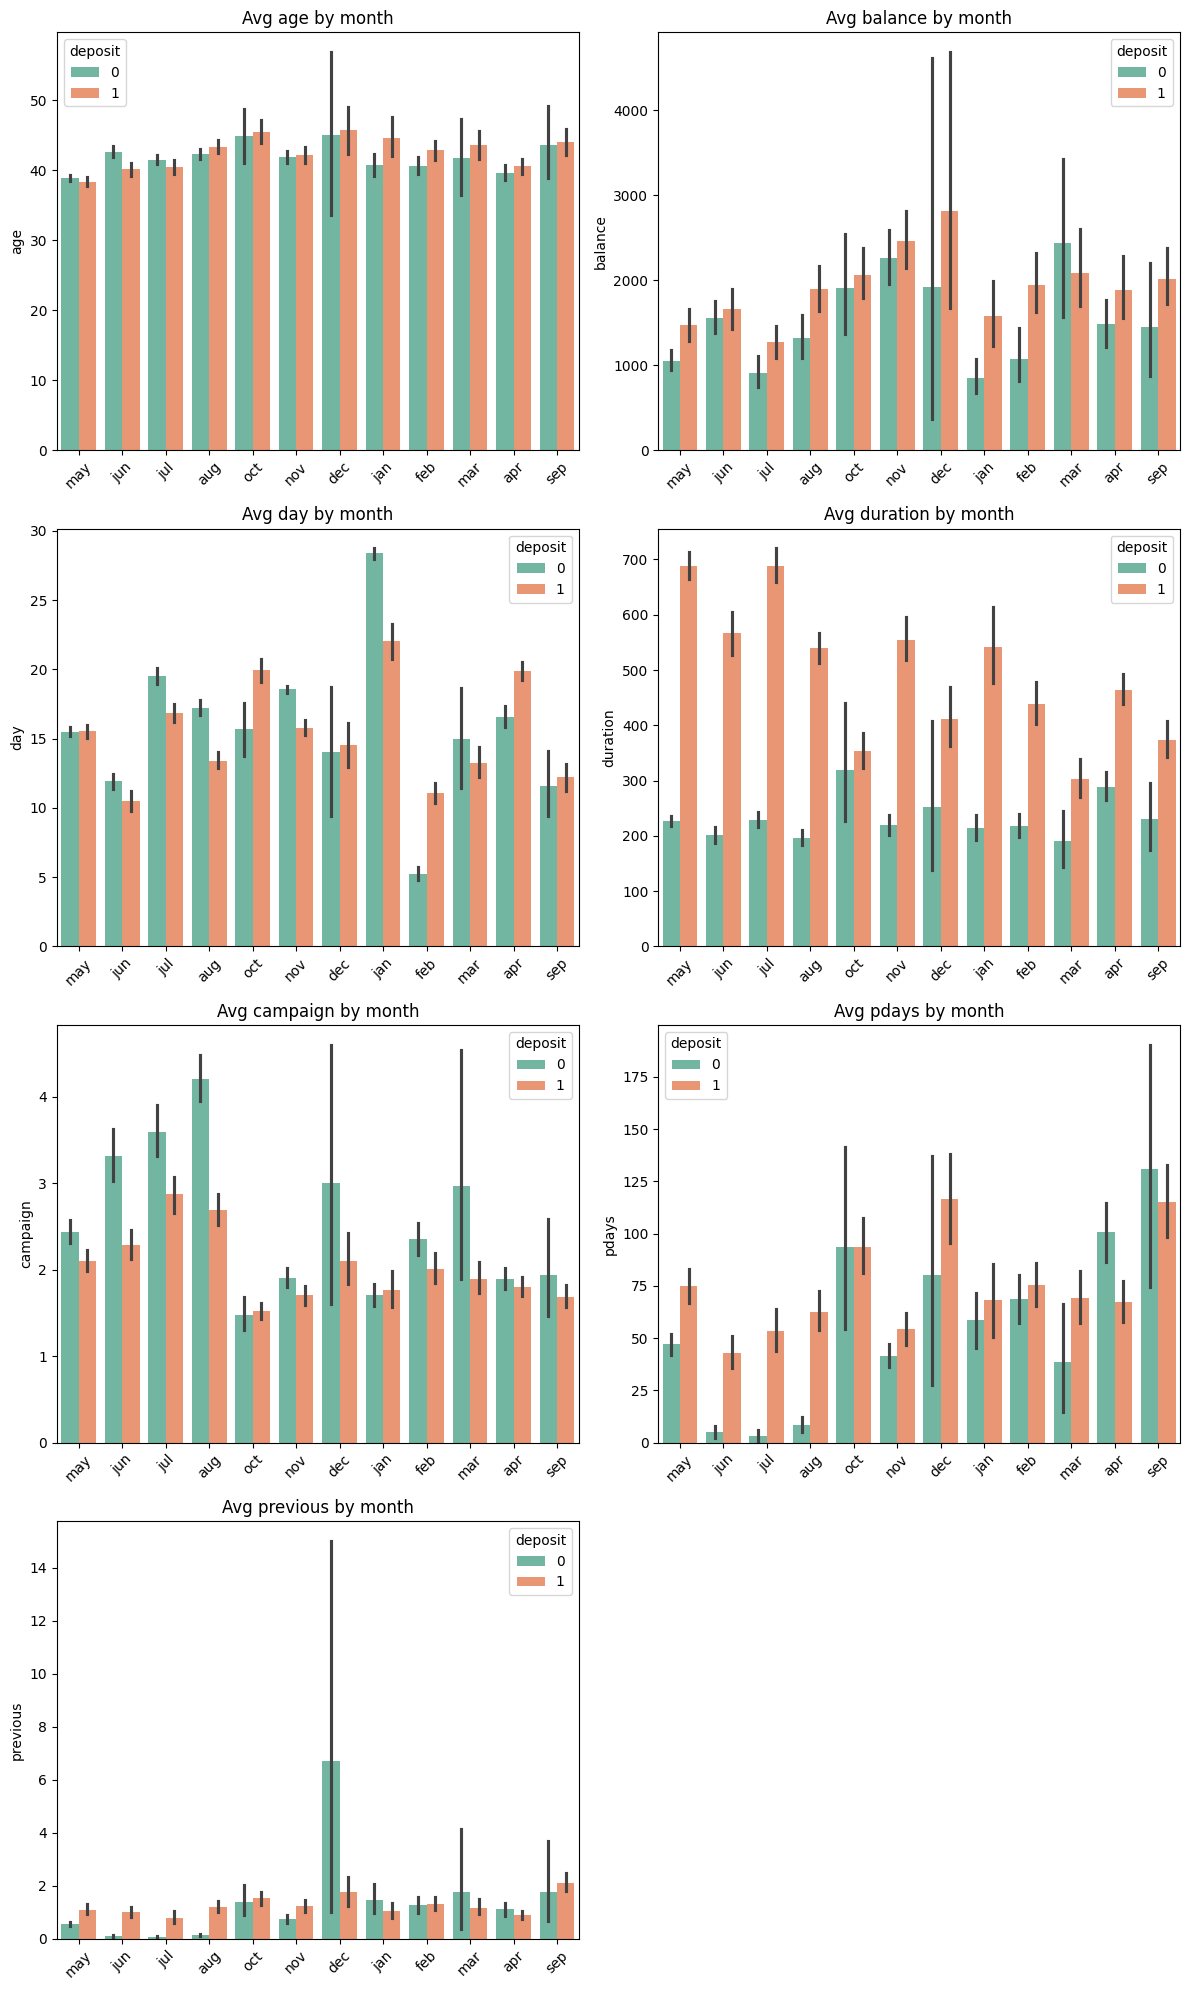


Visualizing numeric features grouped by: poutcome


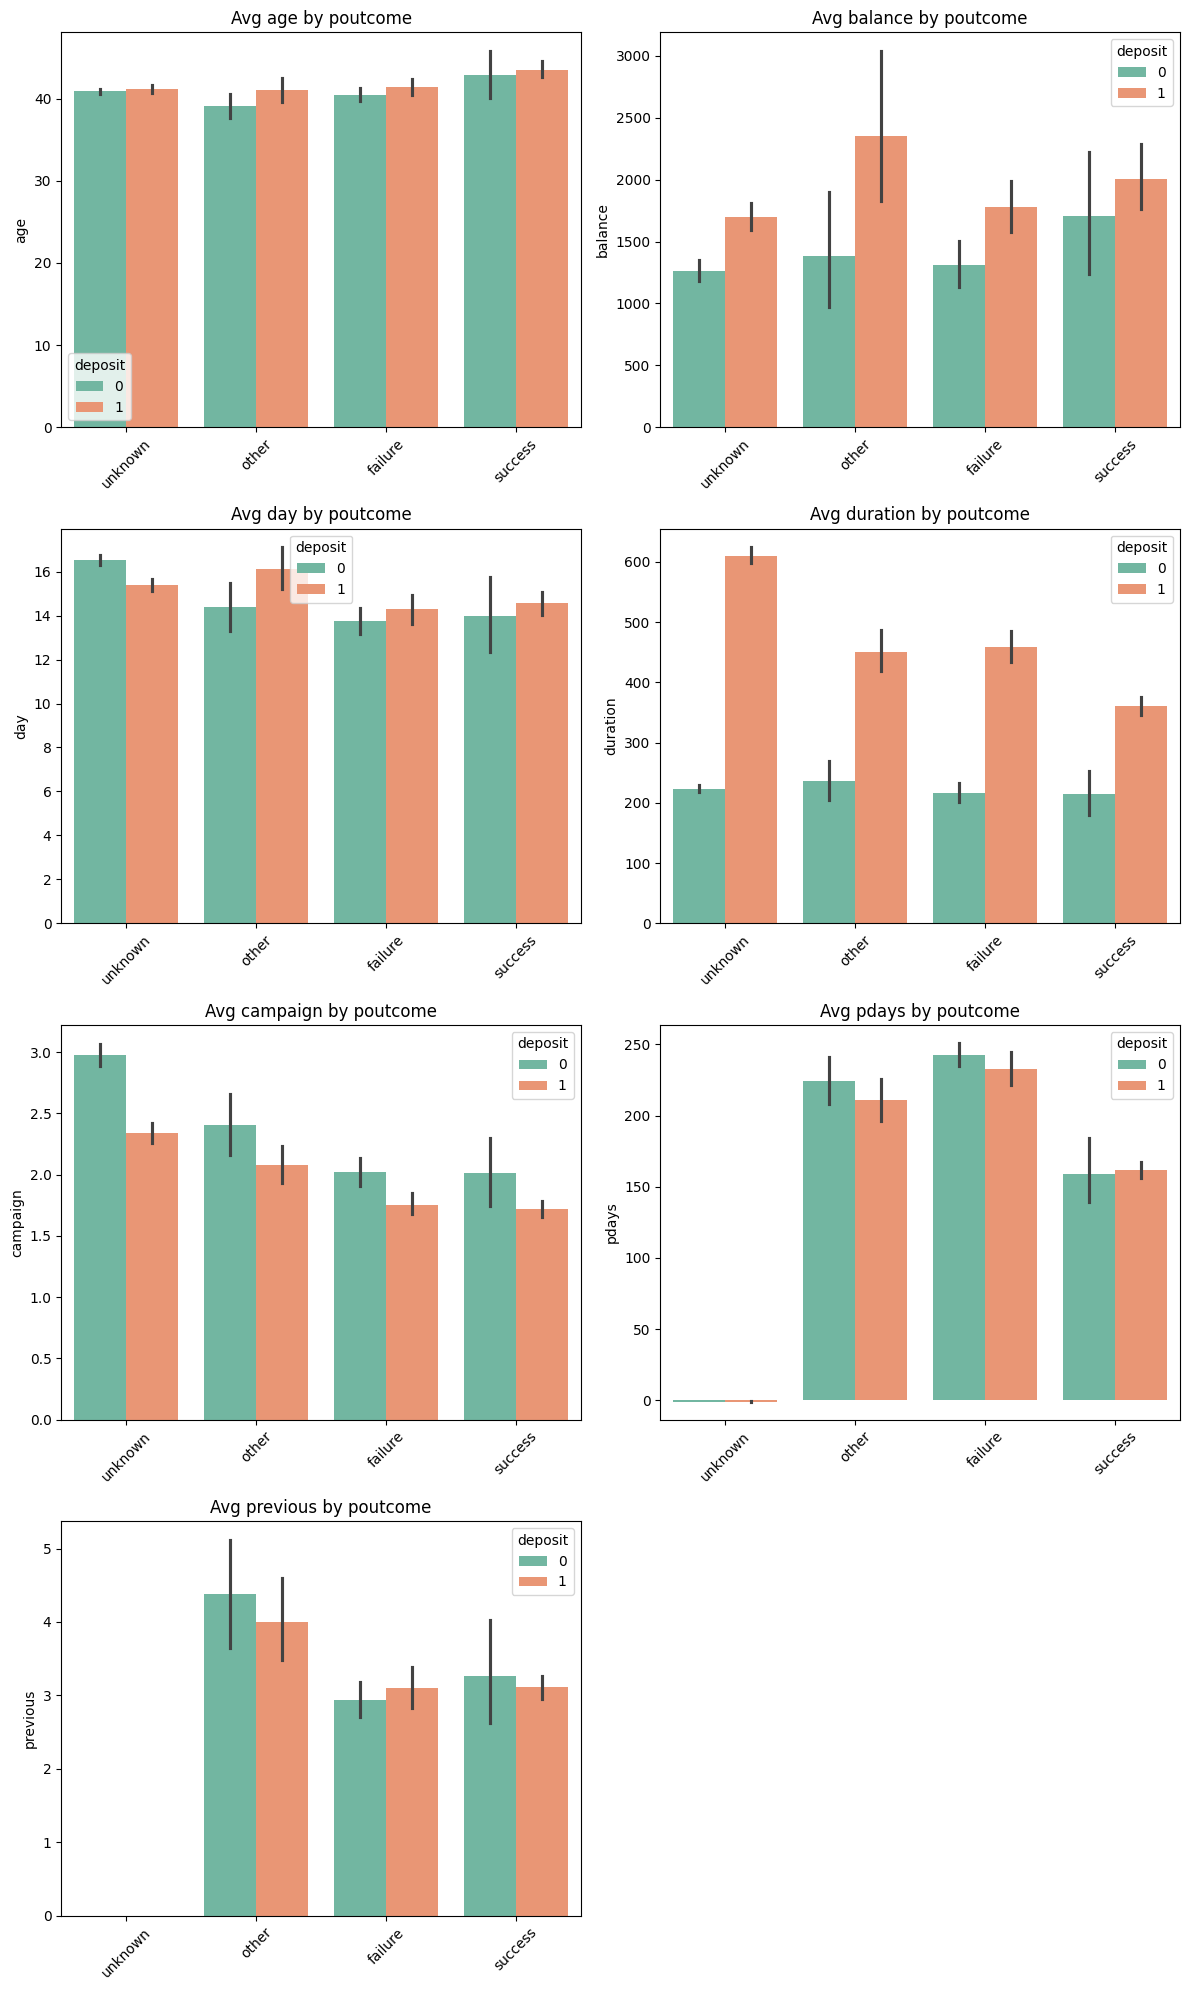

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Loop over each categorical column
for cat_col in categorical_columns:
    print(f"\nVisualizing numeric features grouped by: {cat_col}")

    n_cols = 2
    n_rows = math.ceil(len(numerical_columns) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
    axes = axes.flatten()

    for i, num_col in enumerate(numerical_columns):
        sns.barplot(data=df, x=cat_col, y=num_col, ax=axes[i], palette='Set2',hue='deposit')
        axes[i].set_title(f"Avg {num_col} by {cat_col}")
        axes[i].set_ylabel(num_col)
        axes[i].set_xlabel("")
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [116]:
summary_frames = []

for col in categorical_columns:
    pop_pct   = df[col].value_counts(normalize=True)          # overall share
    deposit_pct = df.groupby(col)['deposit'].mean()               # deposit rate
    frame = pd.DataFrame({
        'feature'   : col,
        'category'  : pop_pct.index,
        'pop_pct'   : (pop_pct*100).round(2),
        'deposit_pct' : (deposit_pct*100).round(2)
    })
    summary_frames.append(frame.reset_index(drop=True))

summary = pd.concat(summary_frames, ignore_index=True)
summary.to_csv('categorical_deposit_summary.csv', index=False)
print("Saved ➜ categorical_deposit_summary.csv")

Saved ➜ categorical_deposit_summary.csv


**Recommendations to Marketing Team**

* Focus campaigns on students, retirees, and management professionals—they convert up to twice the overall average.

* Call in March, September, October, December for peak effectiveness; deprioritise May.

* Leverage prior‑success lists aggressively (91 % conversion).

* Use cellular contact channels; phase out “unknown” numbers.

* Limit follow‑ups to ≤ 3 calls; conversion drops afterwards, risking churn.



# Feature Engineering